In [126]:
#standard packages
import numpy as np
import pandas as pd
from datetime import date, datetime

#for charting
from matplotlib import pyplot as plt
import seaborn as sns

#for analysis
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster
from scipy.spatial.distance import pdist
from scipy.stats import f_oneway
from scipy import stats
import statsmodels.api as sm
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings("ignore")

In [127]:
#load final data
df = pd.read_csv('data//genshin_data.csv')

In [128]:
#check sample size
print("sample size:", len(df))

sample size: 1203


In [129]:
#check for missing values
df.columns[df.isnull().any()].tolist()

['nickname']

In [130]:
#check for a balance sample across the three servers
df.server.value_counts()

os_asia    451
os_usa     389
os_euro    363
Name: server, dtype: int64

<b>Data Processing</b><br>

In [131]:
#rename server name
df['server'] = df['server'].replace({'os_asia': 'asia', 'os_usa': 'usa', 'os_euro': 'euro'})

In [132]:
#Culi is a combined score for Anemoculi, Geoculi, Dendroculi and Electroculi
df['culi'] = df.anemoculi + df.geoculi + df.dendroculi + df.electroculi

In [133]:
#a composite score on the various realms available in the teapot
df['teapot_realm'] = df.floating_abode + df.emerald_peak + df.cool_isle + df.silken_courtyard + df.sublime_spicewood

In [134]:
#a composite score for total exploration in the game
df['total_explored'] = df.mondstadt_explored + df.liyue_explored + df.inazuma_explored + df.enkanomiya_explored + df.the_chasm_explored + df.underground_mines_explored + df.sumeru_explored

In [135]:
#process Spiral Abyss Levels to a score
def abyss_code(txt):
    
    if txt == '-':
        return [0, 0]
    else:
        text_list = txt.split("-")
        floor = int(text_list[0])
        if text_list[1] == 'Jan':
            chamber = 1
        elif text_list[1] == 'Feb':
            chamber = 2
        elif text_list[1] == 'Mar':
            chamber = 3
        else:
            chamber = text_list[1]
        
        score1 = (int(floor)-1)*3 + int(chamber)
        if floor < 8:
            score2 = 0
        elif floor >= 8:
            score2 = (int(floor)-8)*3 + int(chamber)

    return [score1,score2]

In [136]:
df[['abyss_score1', 'abyss_score2']] = df.spiral_abyss.apply(lambda x: pd.Series([abyss_code(x)[0],abyss_code(x)[1]]))

In [137]:
#for curve fitting
df['days_active^2'] = df['days_active'] * df['days_active']
df['1/days_active'] = 1 / df['days_active'] 
df['log(days_active)'] = np.log(df['days_active'])
df['sigmoid(days_active)'] = 1 / (1 + np.exp(-1 * np.log(df['days_active'])))

In [138]:
#calculate number of 5 star limited time banner 5-star characters
df['ban5_characters'] = df.albedo + df.alhaitham + df.arataki_itto + df.cyno + df.eula + df.ganyu + df.hutao + df.kaedehara_kazuha + df.kamisato_ayaka + df.kamisato_ayato + df.klee + df.nahida + df.nilou + df.raiden_shogun + df.sangonomiya_kokomi + df.shenhe + df.tartaglia + df.venti + df.wanderer + df.xiao + df.yae_miko + df.yelan + df.yoimiya + df.zhongli

In [139]:
#calculate number of constellations among limited time banner 5-star characters
df['ban5_constellation'] = df.albedo_constellation + df.alhaitham_constellation + df.arataki_itto_constellation + df.cyno_constellation + df.eula_constellation + df.ganyu_constellation + df.hutao_constellation + df.kaedehara_kazuha_constellation + df.kamisato_ayaka_constellation + df.kamisato_ayato_constellation + df.klee_constellation + df.nahida_constellation + df.nilou_constellation + df.raiden_shogun_constellation + df.sangonomiya_kokomi_constellation + df.shenhe_constellation + df.tartaglia_constellation + df.venti_constellation + df.wanderer_constellation + df.xiao_constellation + df.yae_miko_constellation + df.yelan_constellation + df.yoimiya_constellation + df.zhongli_constellation

In [140]:
#calculate number of 5 star standard banner 5-star characters
df['stand5_characters'] =df.jean + df.qiqi +df.mona + df.keqing + df.diluc + df.tighnari

In [141]:
#calculate number of constellations among standard banner 5-star characters
df['stand5_constellation'] =df.jean_constellation + df.qiqi_constellation +df.mona_constellation + df.keqing_constellation + df.diluc_constellation + df.tighnari_constellation

In [142]:
#calculate number of 5-star characters
df['total_5_characters'] = df.ban5_characters + df.stand5_characters

In [143]:
#calculate number of constellations among 5-star characters
df['total_5_constellation'] = df.ban5_constellation + df.stand5_constellation

In [144]:
#calculate number of 5-star weapons
temp_list = []

for n in df.index:
    count = 0
    if df.albedo_weapon_rarity[n] == 5:
        count += 1
    if df.albedo_weapon_rarity[n] == 5:
        count += 1
    if df.alhaitham_weapon_rarity[n] == 5:
        count += 1
    if df.aloy_weapon_rarity[n] == 5:
        count += 1        
    if df.amber_weapon_rarity[n] == 5:
        count += 1        
    if df.arataki_itto_weapon_rarity[n] == 5:
        count += 1        
    if df.barbara_weapon_rarity[n] == 5:
        count += 1        
    if df.beidou_weapon_rarity[n] == 5:
        count += 1        
    if df.bennett_weapon_rarity[n] == 5:
        count += 1        
    if df.candace_weapon_rarity[n] == 5:
        count += 1        
    if df.chongyun_weapon_rarity[n] == 5:
        count += 1        
    if df.collei_weapon_rarity[n] == 5:
        count += 1        
    if df.cyno_weapon_rarity[n] == 5:
        count += 1        
    if df.diluc_weapon_rarity[n] == 5:
        count += 1        
    if df.diona_weapon_rarity[n] == 5:
        count += 1      
    if df.dori_weapon_rarity[n] == 5:
        count += 1  
    if df.eula_weapon_rarity[n] == 5:
        count += 1  
    if df.faruzan_weapon_rarity[n] == 5:
        count += 1  
    if df.fischl_weapon_rarity[n] == 5:
        count += 1  
    if df.ganyu_weapon_rarity[n] == 5:
        count += 1  
    if df.gorou_weapon_rarity[n] == 5:
        count += 1  
    if df.hutao_weapon_rarity[n] == 5:
        count += 1  
    if df.jean_weapon_rarity[n] == 5:
        count += 1  
    if df.kaedehara_kazuha_weapon_rarity[n] == 5:
        count += 1  
    if df.kaeya_weapon_rarity[n] == 5:
        count += 1  
    if df.kamisato_ayaka_weapon_rarity[n] == 5:
        count += 1  
    if df.kamisato_ayato_weapon_rarity[n] == 5:
        count += 1  
    if df.keqing_weapon_rarity[n] == 5:
        count += 1  
    if df.klee_weapon_rarity[n] == 5:
        count += 1  
    if df.kujou_sara_weapon_rarity[n] == 5:
        count += 1  
    if df.kuki_shinobu_weapon_rarity[n] == 5:
        count += 1  
    if df.layla_weapon_rarity[n] == 5:
        count += 1  
    if df.lisa_weapon_rarity[n] == 5:
        count += 1  
    if df.mona_weapon_rarity[n] == 5:
        count += 1  
    if df.nahida_weapon_rarity[n] == 5:
        count += 1  
    if df.nilou_weapon_rarity[n] == 5:
        count += 1  
    if df.ningguang_weapon_rarity[n] == 5:
        count += 1  
    if df.noelle_weapon_rarity[n] == 5:
        count += 1  
    if df.qiqi_weapon_rarity[n] == 5:
        count += 1  
    if df.raiden_shogun_weapon_rarity[n] == 5:
        count += 1  
    if df.razor_weapon_rarity[n] == 5:
        count += 1  
    if df.rosaria_weapon_rarity[n] == 5:
        count += 1  
    if df.sangonomiya_kokomi_weapon_rarity[n] == 5:
        count += 1  
    if df.sayu_weapon_rarity[n] == 5:
        count += 1  
    if df.shenhe_weapon_rarity[n] == 5:
        count += 1  
    if df.shikanoin_heizou_weapon_rarity[n] == 5:
        count += 1  
    if df.sucrose_weapon_rarity[n] == 5:
        count += 1  
    if df.tartaglia_weapon_rarity[n] == 5:
        count += 1  
    if df.thoma_weapon_rarity[n] == 5:
        count += 1  
    if df.tighnari_weapon_rarity[n] == 5:
        count += 1  
    if df.traveler_aether_weapon_rarity[n] == 5:
        count += 1  
    if df.traveler_lumine_weapon_rarity[n] == 5:
        count += 1  
    if df.venti_weapon_rarity[n] == 5:
        count += 1  
    if df.wanderer_weapon_rarity[n] == 5:
        count += 1  
    if df.xiangling_weapon_rarity[n] == 5:
        count += 1  
    if df.xiao_weapon_rarity[n] == 5:
        count += 1  
    if df.xingqiu_weapon_rarity[n] == 5:
        count += 1  
    if df.xinyan_weapon_rarity[n] == 5:
        count += 1  
    if df.yae_miko_weapon_rarity[n] == 5:
        count += 1  
    if df.yanfei_weapon_rarity[n] == 5:
        count += 1  
    if df.yaoyao_weapon_rarity[n] == 5:
        count += 1  
    if df.yelan_weapon_rarity[n] == 5:
        count += 1  
    if df.yoimiya_weapon_rarity[n] == 5:
        count += 1  
    if df.yun_jin_weapon_rarity[n] == 5:
        count += 1      
    if df.zhongli_weapon_rarity[n] == 5:
        count += 1  
    n += 1
    temp_list.append(count)
    
df['total_5_weapon'] = temp_list

In [145]:
#calculate number of refinements among 5-star weapons
temp_list = []

for n in df.index:
    count = 0
    if df.albedo_weapon_rarity[n] == 5:
        count += df.albedo_weapon_refinement[n]
    if df.alhaitham_weapon_rarity[n] == 5:
        count += df.alhaitham_weapon_refinement[n]
    if df.aloy_weapon_rarity[n] == 5:
        count += df.aloy_weapon_refinement[n]
    if df.amber_weapon_rarity[n] == 5:
        count += df.amber_weapon_refinement[n]
    if df.arataki_itto_weapon_rarity[n] == 5:
        count += df.arataki_itto_weapon_refinement[n]
    if df.barbara_weapon_rarity[n] == 5:
        count += df.barbara_weapon_refinement[n]
    if df.beidou_weapon_rarity[n] == 5:
        count += df.beidou_weapon_refinement[n]
    if df.bennett_weapon_rarity[n] == 5:
        count += df.bennett_weapon_refinement[n]
    if df.candace_weapon_rarity[n] == 5:
        count += df.candace_weapon_refinement[n]
    if df.chongyun_weapon_rarity[n] == 5:
        count += df.chongyun_weapon_refinement[n]
    if df.collei_weapon_rarity[n] == 5:
        count += df.collei_weapon_refinement[n]
    if df.cyno_weapon_rarity[n] == 5:
        count += df.cyno_weapon_refinement[n]
    if df.diluc_weapon_rarity[n] == 5:
        count += df.diluc_weapon_refinement[n]
    if df.diona_weapon_rarity[n] == 5:
        count += df.diona_weapon_refinement[n]
    if df.dori_weapon_rarity[n] == 5:
        count += df.dori_weapon_refinement[n]
    if df.eula_weapon_rarity[n] == 5:
        count += df.eula_weapon_refinement[n]
    if df.faruzan_weapon_rarity[n] == 5:
        count += df.faruzan_weapon_refinement[n]
    if df.fischl_weapon_rarity[n] == 5:
        count += df.fischl_weapon_refinement[n]
    if df.ganyu_weapon_rarity[n] == 5:
        count += df.ganyu_weapon_refinement[n]
    if df.gorou_weapon_rarity[n] == 5:
        count += df.gorou_weapon_refinement[n]
    if df.hutao_weapon_rarity[n] == 5:
        count += df.hutao_weapon_refinement[n]
    if df.jean_weapon_rarity[n] == 5:
        count += df.jean_weapon_refinement[n]
    if df.kaedehara_kazuha_weapon_rarity[n] == 5:
        count += df.kaedehara_kazuha_weapon_refinement[n]
    if df.kaeya_weapon_rarity[n] == 5:
        count += df.kaeya_weapon_refinement[n]
    if df.kamisato_ayaka_weapon_rarity[n] == 5:
        count += df.kamisato_ayaka_weapon_refinement[n]
    if df.kamisato_ayato_weapon_rarity[n] == 5:
        count += df.kamisato_ayato_weapon_refinement[n]
    if df.keqing_weapon_rarity[n] == 5:
        count += df.keqing_weapon_refinement[n]
    if df.klee_weapon_rarity[n] == 5:
        count += df.klee_weapon_refinement[n]
    if df.kujou_sara_weapon_rarity[n] == 5:
        count += df.kujou_sara_weapon_refinement[n]
    if df.kuki_shinobu_weapon_rarity[n] == 5:
        count += df.kuki_shinobu_weapon_refinement[n]
    if df.layla_weapon_rarity[n] == 5:
        count += df.layla_weapon_refinement[n]
    if df.lisa_weapon_rarity[n] == 5:
        count += df.lisa_weapon_refinement[n]
    if df.mona_weapon_rarity[n] == 5:
        count += df.mona_weapon_refinement[n]
    if df.nahida_weapon_rarity[n] == 5:
        count += df.nahida_weapon_refinement[n]
    if df.nilou_weapon_rarity[n] == 5:
        count += df.nilou_weapon_refinement[n]
    if df.ningguang_weapon_rarity[n] == 5:
        count += df.ningguang_weapon_refinement[n]
    if df.noelle_weapon_rarity[n] == 5:
        count += df.noelle_weapon_refinement[n]
    if df.qiqi_weapon_rarity[n] == 5:
        count += df.qiqi_weapon_refinement[n]
    if df.raiden_shogun_weapon_rarity[n] == 5:
        count += df.raiden_shogun_weapon_refinement[n]
    if df.razor_weapon_rarity[n] == 5:
        count += df.razor_weapon_refinement[n]
    if df.rosaria_weapon_rarity[n] == 5:
        count += df.rosaria_weapon_refinement[n]
    if df.sangonomiya_kokomi_weapon_rarity[n] == 5:
        count += df.sangonomiya_kokomi_weapon_refinement[n]
    if df.sayu_weapon_rarity[n] == 5:
        count += df.sayu_weapon_refinement[n]
    if df.shenhe_weapon_rarity[n] == 5:
        count += df.shenhe_weapon_refinement[n]
    if df.shikanoin_heizou_weapon_rarity[n] == 5:
        count += df.shikanoin_heizou_weapon_refinement[n]
    if df.sucrose_weapon_rarity[n] == 5:
        count += df.sucrose_weapon_refinement[n]
    if df.tartaglia_weapon_rarity[n] == 5:
        count += df.tartaglia_weapon_refinement[n]
    if df.thoma_weapon_rarity[n] == 5:
        count += df.thoma_weapon_refinement[n]
    if df.tighnari_weapon_rarity[n] == 5:
        count += df.tighnari_weapon_refinement[n]
    if df.traveler_aether_weapon_rarity[n] == 5:
        count += df.traveler_aether_weapon_refinement[n]
    if df.traveler_lumine_weapon_rarity[n] == 5:
        count += df.traveler_lumine_weapon_refinement[n]
    if df.venti_weapon_rarity[n] == 5:
        count += df.venti_weapon_refinement[n]
    if df.wanderer_weapon_rarity[n] == 5:
        count += df.wanderer_weapon_refinement[n]
    if df.xiangling_weapon_rarity[n] == 5:
        count += df.xiangling_weapon_refinement[n]
    if df.xiao_weapon_rarity[n] == 5:
        count += df.xiao_weapon_refinement[n]
    if df.xingqiu_weapon_rarity[n] == 5:
        count += df.xingqiu_weapon_refinement[n]
    if df.xinyan_weapon_rarity[n] == 5:
        count += df.xinyan_weapon_refinement[n]
    if df.yae_miko_weapon_rarity[n] == 5:
        count += df.yae_miko_weapon_refinement[n]
    if df.yanfei_weapon_rarity[n] == 5:
        count += df.yanfei_weapon_refinement[n]
    if df.yaoyao_weapon_rarity[n] == 5:
        count += df.yaoyao_weapon_refinement[n]
    if df.yelan_weapon_rarity[n] == 5:
        count += df.yelan_weapon_refinement[n]
    if df.yoimiya_weapon_rarity[n] == 5:
        count += df.yoimiya_weapon_refinement[n]
    if df.yun_jin_weapon_rarity[n] == 5: 
        count += df.yun_jin_weapon_refinement[n]
    if df.zhongli_weapon_rarity[n] == 5:
        count += df.zhongli_weapon_refinement[n]
        
    n += 1
    temp_list.append(count)
    
df['total_5_refinement'] = temp_list

<b>Days Active</b><br>
No. of days playing Genshin Impact since launched

In [146]:
#Genshin Impact was launched in 28 September 2020
from datetime import date, datetime
max_days_active = date.today() - datetime.strptime('09-28-2020', '%m-%d-%Y').date()
print('Max Number of Days Active: ', max_days_active.days +1)

Max Number of Days Active:  873


In [147]:
df.days_active.describe()

count    1203.000000
mean      404.566916
std       256.716174
min        20.000000
25%       173.000000
50%       376.000000
75%       607.000000
max       860.000000
Name: days_active, dtype: float64

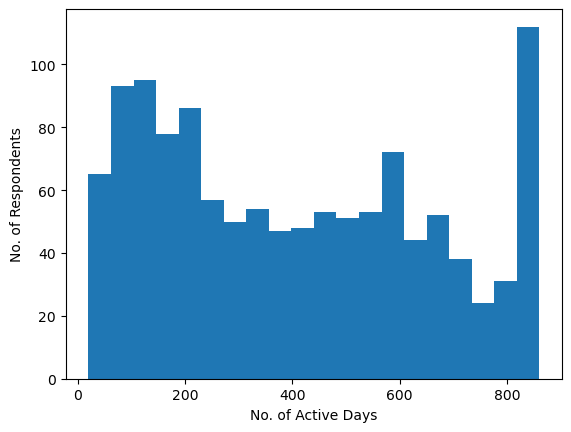

In [148]:
plt.hist(df.days_active, bins=20)
plt.xlabel("No. of Active Days")
plt.ylabel("No. of Respondents")
plt.show()

In [149]:
asia_list = df[df['server'] == 'asia'].days_active.tolist()
euro_list = df[df['server'] == 'euro'].days_active.tolist()
usa_list = df[df['server'] == 'usa'].days_active.tolist()
f, p = f_oneway(asia_list, euro_list, usa_list)

print('asia','range:',min(asia_list),'-',max(asia_list),'mean:',sum(asia_list)/len(asia_list))
print('euro','range:',min(euro_list),'-',max(euro_list),'mean:',sum(euro_list)/len(euro_list))
print('usa ','range:',min(usa_list),'-',max(usa_list),'mean:',sum(usa_list)/len(usa_list))

if p <= 0.05:
    print(p, 'significant difference between server')
else:
    print(p, 'no significant difference between server')       

asia range: 21 - 860 mean: 417.0110864745011
euro range: 22 - 860 mean: 413.4848484848485
usa  range: 20 - 860 mean: 381.81748071979433
0.10260862601242378 no significant difference between server


<b>Level</b></br>
Adventure rank of the player<br>
Max is 60.

In [150]:
df.level.describe()

count    1203.000000
mean       54.734830
std         6.714056
min         0.000000
25%        54.000000
50%        57.000000
75%        59.000000
max        60.000000
Name: level, dtype: float64

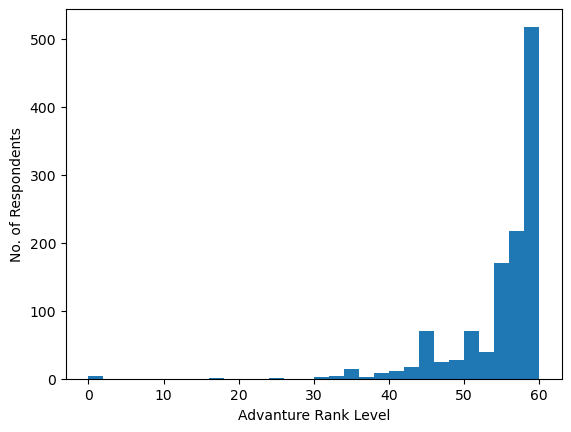

In [151]:
plt.hist(df.level, bins=30)
plt.xlabel("Advanture Rank Level")
plt.ylabel("No. of Respondents")
plt.show()

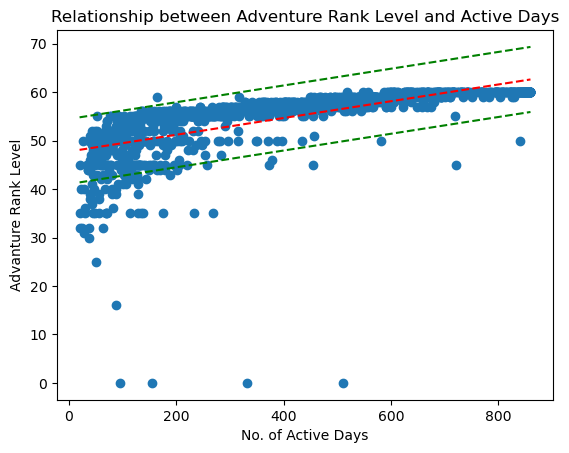

In [152]:
df = df.sort_values(by=['days_active'])
x = df.days_active.tolist()
y = df.level.tolist()
plt.scatter(x, y)
plt.xlabel("No. of Active Days")
plt.ylabel("Advanture Rank Level")
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.plot(x,p(x)+np.std(df.level.tolist()),"g--")
plt.plot(x,p(x)-np.std(df.level.tolist()),"g--")
plt.title("Relationship between Adventure Rank Level and Active Days")
plt.show()

                            OLS Regression Results                            
Dep. Variable:                  level   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.530
Method:                 Least Squares   F-statistic:                     679.7
Date:                Fri, 17 Feb 2023   Prob (F-statistic):          4.21e-198
Time:                        23:41:49   Log-Likelihood:                -3541.6
No. Observations:                1203   AIC:                             7089.
Df Residuals:                    1200   BIC:                             7105.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               17.8753      1.941  

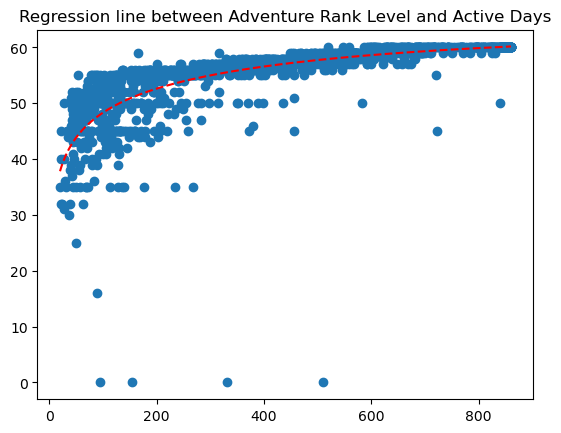

In [153]:
#max model: df[['days_active','days_active^2','1/days_active','log(days_active)','sigmoid(days_active)']]
df = df.sort_values(by=['days_active'])
y_sm = df.level
x_sm = df[['days_active','log(days_active)']]
x_sm = sm.add_constant(x_sm)
model = sm.OLS(y_sm, x_sm)
results = model.fit()
ypred = results.predict(x_sm)
print(results.summary())

plt.scatter(df.days_active, y_sm, label='data')
plt.plot(x,ypred,"r--")
plt.title("Regression line between Adventure Rank Level and Active Days")
plt.show()

In [154]:
asia_list = df[df['server'] == 'asia'].level.tolist()
euro_list = df[df['server'] == 'euro'].level.tolist()
usa_list = df[df['server'] == 'usa'].level.tolist()
f, p = f_oneway(asia_list, euro_list, usa_list)

print('asia','range:',min(asia_list),'-',max(asia_list),'mean:',sum(asia_list)/len(asia_list))
print('euro','range:',min(euro_list),'-',max(euro_list),'mean:',sum(euro_list)/len(euro_list))
print('usa ','range:',min(usa_list),'-',max(usa_list),'mean:',sum(usa_list)/len(usa_list))

if p <= 0.05:
    print(p, 'significant difference between server')
else:
    print(p, 'no significant difference between server')  

asia range: 32 - 60 mean: 55.04212860310421
euro range: 0 - 60 mean: 54.92011019283746
usa  range: 0 - 60 mean: 54.20565552699229
0.16225990909571927 no significant difference between server


<b>Achievements</b></br>
No. of game achievements (i.e. required to complete certain activity in game)<br>
Max is 890.

In [155]:
df.achievements.describe()

count    1203.000000
mean      542.795511
std       217.425321
min        78.000000
25%       351.500000
50%       551.000000
75%       734.500000
max       875.000000
Name: achievements, dtype: float64

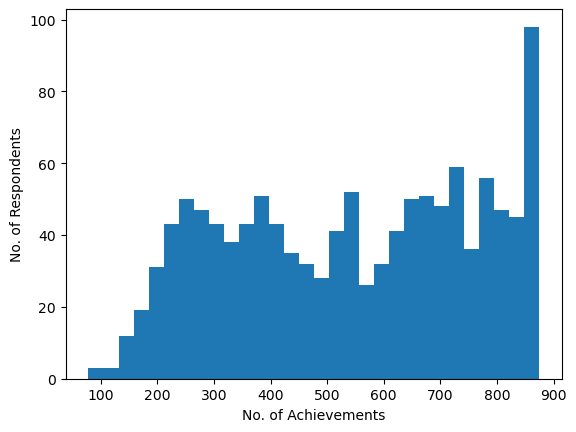

In [156]:
plt.hist(df.achievements, bins=30)
plt.xlabel("No. of Achievements")
plt.ylabel("No. of Respondents")
plt.show()

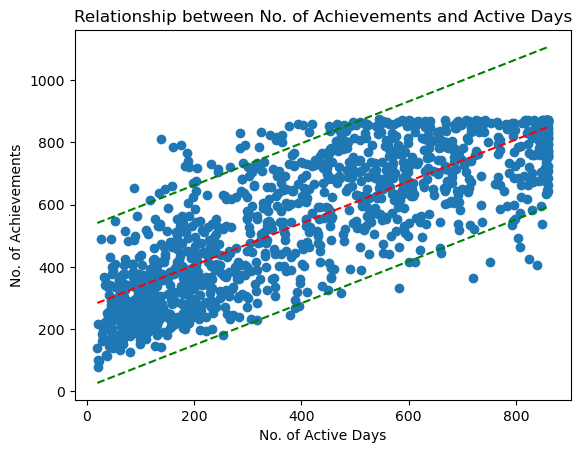

In [157]:
x = df.days_active.tolist()
y = df.achievements.tolist()
plt.scatter(x, y)
plt.xlabel("No. of Active Days")
plt.ylabel("No. of Achievements")
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.plot(x,p(x)+np.std(df.days_active.tolist()),"g--")
plt.plot(x,p(x)-np.std(df.days_active.tolist()),"g--")
plt.title("Relationship between No. of Achievements and Active Days")
plt.show()

                            OLS Regression Results                            
Dep. Variable:           achievements   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     1091.
Date:                Fri, 17 Feb 2023   Prob (F-statistic):          1.09e-270
Time:                        23:41:49   Log-Likelihood:                -7557.7
No. Observations:                1203   AIC:                         1.512e+04
Df Residuals:                    1200   BIC:                         1.514e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -397.5473     39.864  

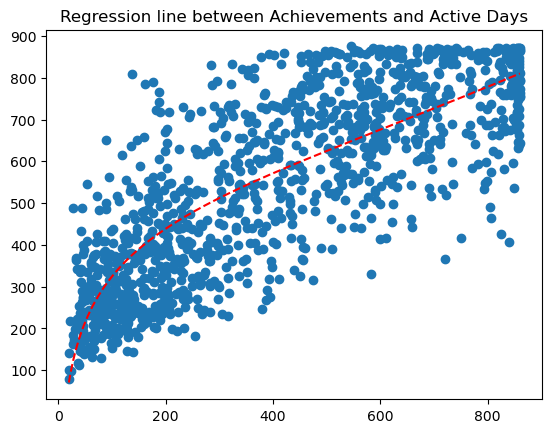

In [158]:
# df[['days_active','days_active^2','1/days_active','log(days_active)','sigmoid(days_active)']]
f = df.sort_values(by=['days_active'])
y_sm = df.achievements
x_sm = df[['days_active^2','log(days_active)']]
x_sm = sm.add_constant(x_sm)
model = sm.OLS(y_sm, x_sm)
results = model.fit()
ypred = results.predict(x_sm)
print(results.summary())

plt.scatter(df.days_active, y_sm, label='data')
plt.plot(x,ypred,"r--")
plt.title("Regression line between Achievements and Active Days")
plt.show()

In [159]:
asia_list = df[df['server'] == 'asia'].achievements.tolist()
euro_list = df[df['server'] == 'euro'].achievements.tolist()
usa_list = df[df['server'] == 'usa'].achievements.tolist()
f, p = f_oneway(asia_list, euro_list, usa_list)

print('asia','range:',min(asia_list),'-',max(asia_list),'mean:',sum(asia_list)/len(asia_list))
print('euro','range:',min(euro_list),'-',max(euro_list),'mean:',sum(euro_list)/len(euro_list))
print('usa ','range:',min(usa_list),'-',max(usa_list),'mean:',sum(usa_list)/len(usa_list))

if p <= 0.05:
    print(p, 'significant difference between server')
else:
    print(p, 'no significant difference between server')  

asia range: 100 - 872 mean: 543.9955654101996
euro range: 113 - 875 mean: 562.5537190082645
usa  range: 78 - 871 mean: 522.9665809768637
0.043878531328065316 significant difference between server


<b>Characters</b></br>
No. of characters the player has<br>
Max is 63.

In [160]:
df.characters.describe()

count    1203.000000
mean       39.768911
std        10.627945
min         6.000000
25%        32.000000
50%        41.000000
75%        47.000000
max        63.000000
Name: characters, dtype: float64

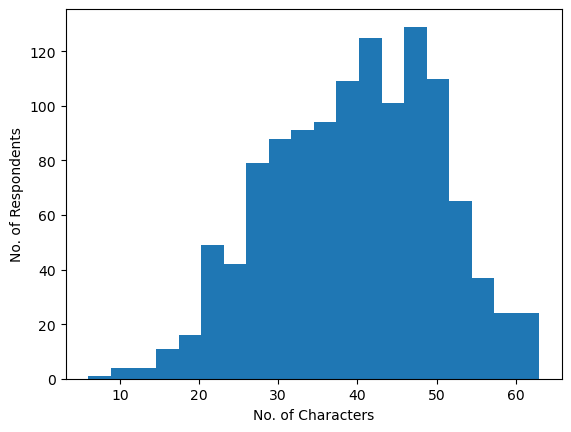

In [161]:
plt.hist(df.characters, bins=20)
plt.xlabel("No. of Characters")
plt.ylabel("No. of Respondents")
plt.show()

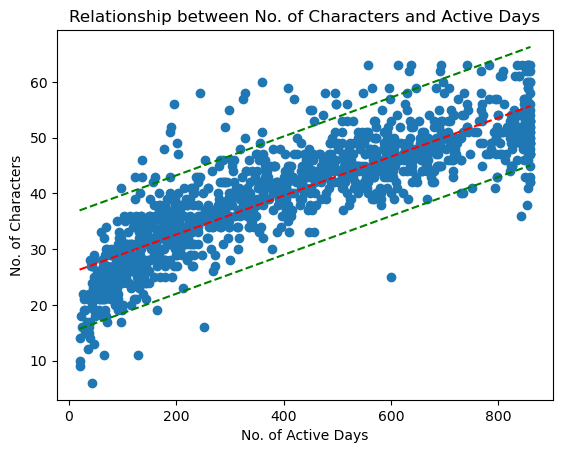

In [162]:
x = df.days_active.tolist()
y = df.characters.tolist()
plt.scatter(x, y)
plt.xlabel("No. of Active Days")
plt.ylabel("No. of Characters")
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.plot(x,p(x)+np.std(df.characters.tolist()),"g--")
plt.plot(x,p(x)-np.std(df.characters.tolist()),"g--")
plt.title("Relationship between No. of Characters and Active Days")
plt.show()

                            OLS Regression Results                            
Dep. Variable:             characters   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     1967.
Date:                Fri, 17 Feb 2023   Prob (F-statistic):               0.00
Time:                        23:41:49   Log-Likelihood:                -3675.5
No. Observations:                1203   AIC:                             7357.
Df Residuals:                    1200   BIC:                             7372.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -15.3776      1.582  

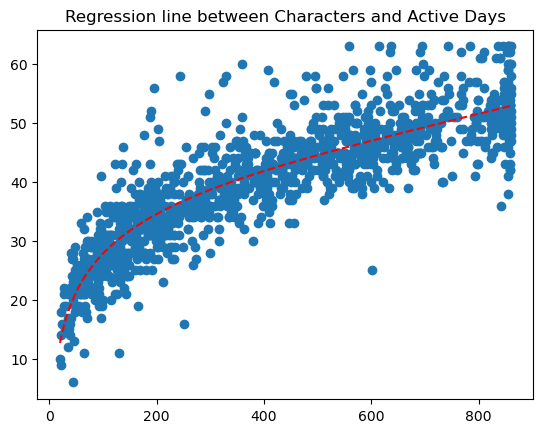

In [163]:
# df[['days_active','days_active^2','1/days_active','log(days_active)','sigmoid(days_active)']]
f = df.sort_values(by=['days_active'])
y_sm = df.characters
x_sm = df[['days_active^2','log(days_active)']]
x_sm = sm.add_constant(x_sm)
model = sm.OLS(y_sm, x_sm)
results = model.fit()
ypred = results.predict(x_sm)
print(results.summary())

plt.scatter(df.days_active, y_sm, label='data')
plt.plot(x,ypred,"r--")
plt.title("Regression line between Characters and Active Days")
plt.show()

In [164]:
asia_list = df[df['server'] == 'asia'].characters.tolist()
euro_list = df[df['server'] == 'euro'].characters.tolist()
usa_list = df[df['server'] == 'usa'].characters.tolist()
f, p = f_oneway(asia_list, euro_list, usa_list)

print('asia','range:',min(asia_list),'-',max(asia_list),'mean:',sum(asia_list)/len(asia_list))
print('euro','range:',min(euro_list),'-',max(euro_list),'mean:',sum(euro_list)/len(euro_list))
print('usa ','range:',min(usa_list),'-',max(usa_list),'mean:',sum(usa_list)/len(usa_list))

if p <= 0.05:
    print(p, 'significant difference between server')
else:
    print(p, 'no significant difference between server') 

asia range: 11 - 63 mean: 39.32150776053215
euro range: 6 - 63 mean: 39.917355371900825
usa  range: 9 - 63 mean: 40.149100257069406
0.5050106102824565 no significant difference between server


<b>Total no. of 5-Star Characters</b></br>
No. of 5-Star characters the player has in his/her showcase<br>
Max is 8.

In [165]:
df.total_5_characters.describe()

count    1203.000000
mean        5.335827
std         2.331568
min         0.000000
25%         3.000000
50%         6.000000
75%         8.000000
max         8.000000
Name: total_5_characters, dtype: float64

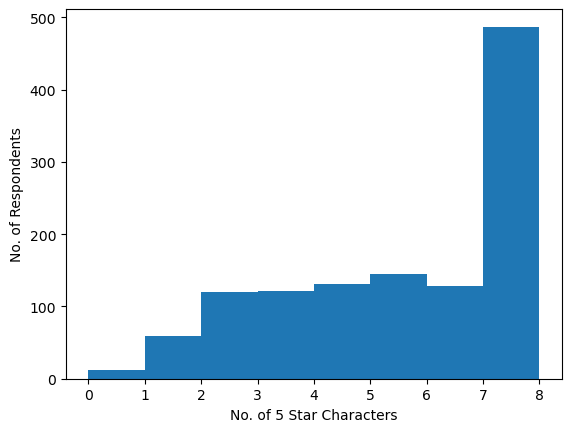

In [166]:
plt.hist(df.total_5_characters, bins=8)
plt.xlabel("No. of 5 Star Characters")
plt.ylabel("No. of Respondents")
plt.show()

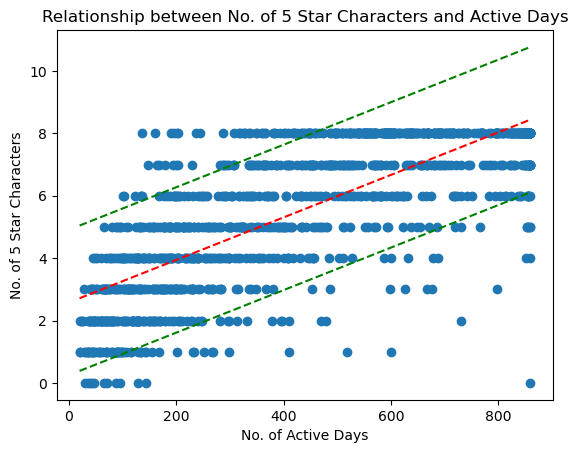

In [167]:
x = df.days_active.tolist()
y = df.total_5_characters.tolist()
plt.scatter(x, y)
plt.xlabel("No. of Active Days")
plt.ylabel("No. of 5 Star Characters")
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.plot(x,p(x)+np.std(df.total_5_characters.tolist()),"g--")
plt.plot(x,p(x)-np.std(df.total_5_characters.tolist()),"g--")
plt.title("Relationship between No. of 5 Star Characters and Active Days")
plt.show()

                            OLS Regression Results                            
Dep. Variable:     total_5_characters   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     1017.
Date:                Fri, 17 Feb 2023   Prob (F-statistic):          5.22e-259
Time:                        23:41:50   Log-Likelihood:                -2128.7
No. Observations:                1203   AIC:                             4263.
Df Residuals:                    1200   BIC:                             4279.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.2282      0.120     10.216

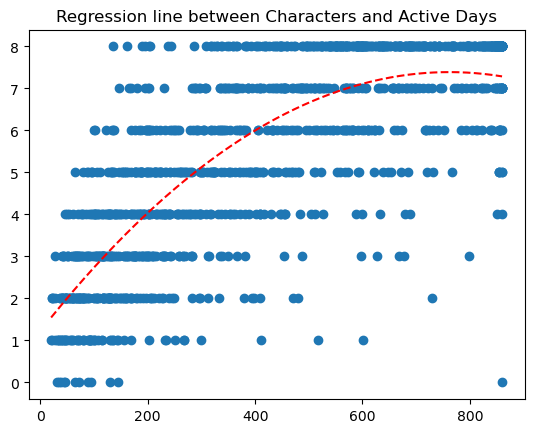

In [168]:
# df[['days_active','days_active^2','1/days_active','log(days_active)','sigmoid(days_active)']]
f = df.sort_values(by=['days_active'])
y_sm = df.total_5_characters
x_sm = df[['days_active','days_active^2']]
x_sm = sm.add_constant(x_sm)
model = sm.OLS(y_sm, x_sm)
results = model.fit()
ypred = results.predict(x_sm)
print(results.summary())

plt.scatter(df.days_active, y_sm, label='data')
plt.plot(x,ypred,"r--")
plt.title("Regression line between Characters and Active Days")
plt.show()

In [169]:
asia_list = df[df['server'] == 'asia'].total_5_characters.tolist()
euro_list = df[df['server'] == 'euro'].total_5_characters.tolist()
usa_list = df[df['server'] == 'usa'].total_5_characters.tolist()
f, p = f_oneway(asia_list, euro_list, usa_list)

print('asia','range:',min(asia_list),'-',max(asia_list),'mean:',sum(asia_list)/len(asia_list))
print('euro','range:',min(euro_list),'-',max(euro_list),'mean:',sum(euro_list)/len(euro_list))
print('usa ','range:',min(usa_list),'-',max(usa_list),'mean:',sum(usa_list)/len(usa_list))

if p <= 0.05:
    print(p, 'significant difference between server')
else:
    print(p, 'no significant difference between server') 

asia range: 0 - 8 mean: 5.339246119733924
euro range: 0 - 8 mean: 5.3911845730027546
usa  range: 0 - 8 mean: 5.280205655526992
0.8080180603857757 no significant difference between server


<b>Total no. of Constellations among 5-Star Characters</b></br>
No. of Constellations among 5-Star characters the player has in his/her showcase<br>
Max is 48.

In [170]:
df.total_5_constellation.describe()

count    1203.000000
mean        2.762261
std         5.241585
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max        48.000000
Name: total_5_constellation, dtype: float64

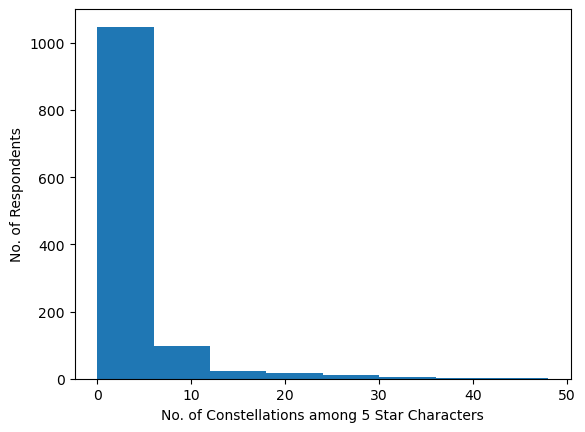

In [171]:
plt.hist(df.total_5_constellation, bins=8)
plt.xlabel("No. of Constellations among 5 Star Characters")
plt.ylabel("No. of Respondents")
plt.show()

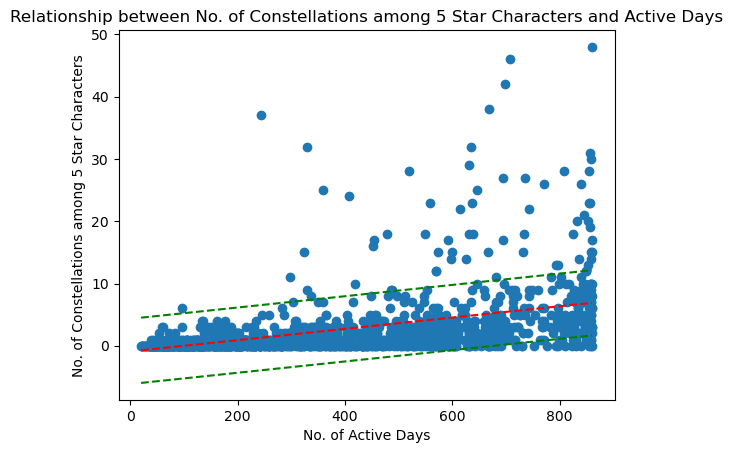

In [172]:
x = df.days_active.tolist()
y = df.total_5_constellation.tolist()
plt.scatter(x, y)
plt.xlabel("No. of Active Days")
plt.ylabel("No. of Constellations among 5 Star Characters")
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.plot(x,p(x)+np.std(df.total_5_constellation.tolist()),"g--")
plt.plot(x,p(x)-np.std(df.total_5_constellation.tolist()),"g--")
plt.title("Relationship between No. of Constellations among 5 Star Characters and Active Days")
plt.show()

                              OLS Regression Results                             
Dep. Variable:     total_5_constellation   R-squared:                       0.198
Model:                               OLS   Adj. R-squared:                  0.197
Method:                    Least Squares   F-statistic:                     296.0
Date:                   Fri, 17 Feb 2023   Prob (F-statistic):           1.79e-59
Time:                           23:41:50   Log-Likelihood:                -3566.9
No. Observations:                   1203   AIC:                             7138.
Df Residuals:                       1201   BIC:                             7148.
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.91

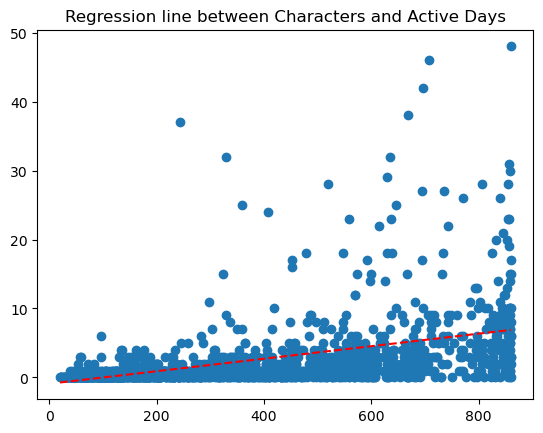

In [173]:
# df[['days_active','days_active^2','1/days_active','log(days_active)','sigmoid(days_active)']]
f = df.sort_values(by=['days_active'])
y_sm = df.total_5_constellation
x_sm = df[['days_active']]
x_sm = sm.add_constant(x_sm)
model = sm.OLS(y_sm, x_sm)
results = model.fit()
ypred = results.predict(x_sm)
print(results.summary())

plt.scatter(df.days_active, y_sm, label='data')
plt.plot(x,ypred,"r--")
plt.title("Regression line between Characters and Active Days")
plt.show()

In [174]:
asia_list = df[df['server'] == 'asia'].total_5_constellation.tolist()
euro_list = df[df['server'] == 'euro'].total_5_constellation.tolist()
usa_list = df[df['server'] == 'usa'].total_5_constellation.tolist()
f, p = f_oneway(asia_list, euro_list, usa_list)

print('asia','range:',min(asia_list),'-',max(asia_list),'mean:',sum(asia_list)/len(asia_list))
print('euro','range:',min(euro_list),'-',max(euro_list),'mean:',sum(euro_list)/len(euro_list))
print('usa ','range:',min(usa_list),'-',max(usa_list),'mean:',sum(usa_list)/len(usa_list))

if p <= 0.05:
    print(p, 'significant difference between server')
else:
    print(p, 'no significant difference between server')

asia range: 0 - 42 mean: 2.563192904656319
euro range: 0 - 32 mean: 2.1818181818181817
usa  range: 0 - 48 mean: 3.5347043701799485
0.0011113838233427905 significant difference between server


<b>Total no. of 5-Star Weapons</b></br>
No. of 5-Star Weapons the player has in his/her showcase<br>
Max is 8.

In [175]:
df.total_5_weapon.describe()

count    1203.000000
mean        2.113882
std         1.937329
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         8.000000
Name: total_5_weapon, dtype: float64

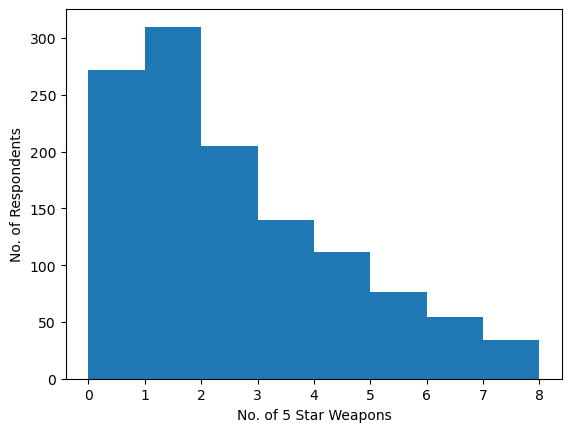

In [176]:
plt.hist(df.total_5_weapon, bins=8)
plt.xlabel("No. of 5 Star Weapons")
plt.ylabel("No. of Respondents")
plt.show()

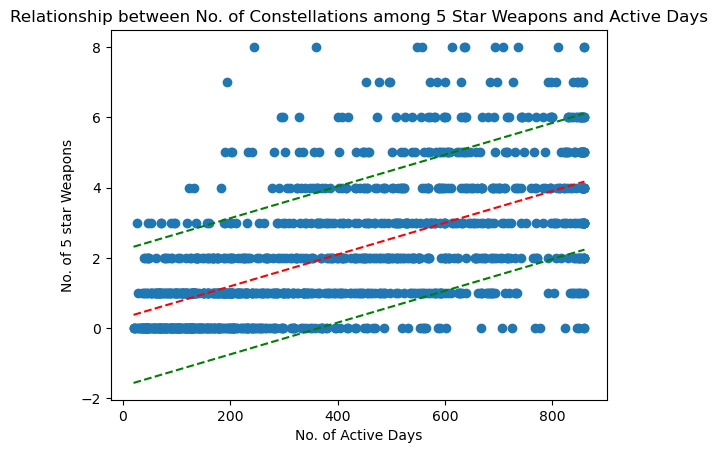

In [177]:
x = df.days_active.tolist()
y = df.total_5_weapon.tolist()
plt.scatter(x, y)
plt.xlabel("No. of Active Days")
plt.ylabel("No. of 5 star Weapons")
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.plot(x,p(x)+np.std(df.total_5_weapon.tolist()),"g--")
plt.plot(x,p(x)-np.std(df.total_5_weapon.tolist()),"g--")
plt.title("Relationship between No. of Constellations among 5 Star Weapons and Active Days")
plt.show()

                            OLS Regression Results                            
Dep. Variable:         total_5_weapon   R-squared:                       0.358
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     669.2
Date:                Fri, 17 Feb 2023   Prob (F-statistic):          1.20e-117
Time:                        23:41:50   Log-Likelihood:                -2235.6
No. Observations:                1203   AIC:                             4475.
Df Residuals:                    1201   BIC:                             4485.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2876      0.084      3.440      

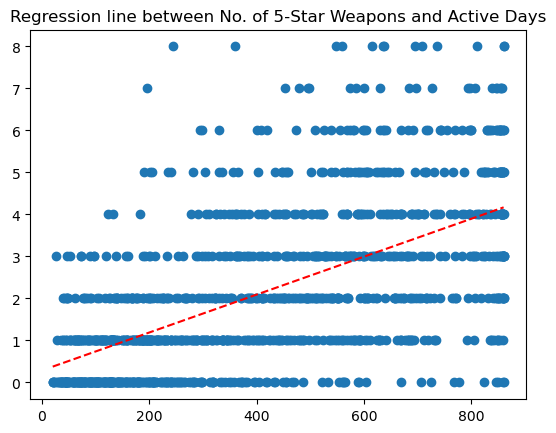

In [178]:
# df[['days_active','days_active^2','1/days_active','log(days_active)','sigmoid(days_active)']]
f = df.sort_values(by=['days_active'])
y_sm = df.total_5_weapon
x_sm = df[['days_active']]
x_sm = sm.add_constant(x_sm)
model = sm.OLS(y_sm, x_sm)
results = model.fit()
ypred = results.predict(x_sm)
print(results.summary())

plt.scatter(df.days_active, y_sm, label='data')
plt.plot(x,ypred,"r--")
plt.title("Regression line between No. of 5-Star Weapons and Active Days")
plt.show()

In [179]:
asia_list = df[df['server'] == 'asia'].total_5_weapon.tolist()
euro_list = df[df['server'] == 'euro'].total_5_weapon.tolist()
usa_list = df[df['server'] == 'usa'].total_5_weapon.tolist()
f, p = f_oneway(asia_list, euro_list, usa_list)

print('asia','range:',min(asia_list),'-',max(asia_list),'mean:',sum(asia_list)/len(asia_list))
print('euro','range:',min(euro_list),'-',max(euro_list),'mean:',sum(euro_list)/len(euro_list))
print('usa ','range:',min(usa_list),'-',max(usa_list),'mean:',sum(usa_list)/len(usa_list))

if p <= 0.05:
    print(p, 'significant difference between server')
else:
    print(p, 'no significant difference between server')

asia range: 0 - 8 mean: 2.1441241685144123
euro range: 0 - 8 mean: 1.9944903581267217
usa  range: 0 - 8 mean: 2.190231362467866
0.3515105848757237 no significant difference between server


<b>Total no. of Refinements among 5-Star Weapons</b></br>
No. of Refinements among 5-Star Weapons the player has in his/her showcase<br>
Max is 40.

In [180]:
df.total_5_refinement.describe()

count    1203.000000
mean        2.486284
std         3.103394
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        37.000000
Name: total_5_refinement, dtype: float64

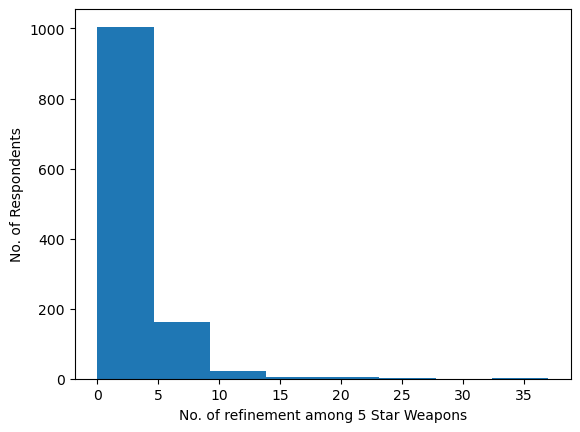

In [181]:
plt.hist(df.total_5_refinement, bins=8)
plt.xlabel("No. of refinement among 5 Star Weapons")
plt.ylabel("No. of Respondents")
plt.show()

                            OLS Regression Results                            
Dep. Variable:     total_5_refinement   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     368.1
Date:                Fri, 17 Feb 2023   Prob (F-statistic):           8.83e-72
Time:                        23:41:50   Log-Likelihood:                -2908.0
No. Observations:                1203   AIC:                             5820.
Df Residuals:                    1201   BIC:                             5830.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1174      0.146      0.803      

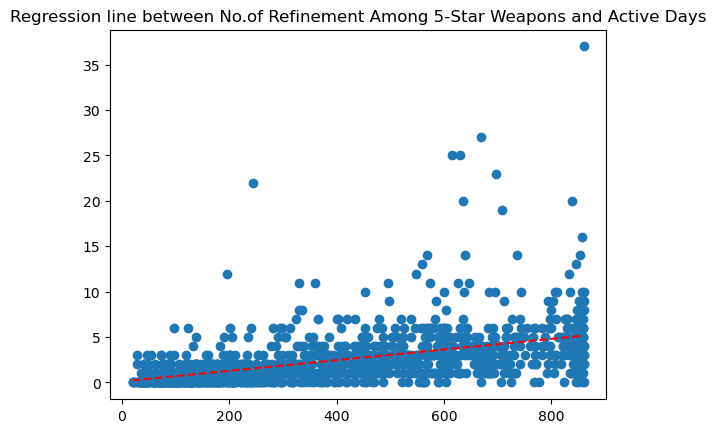

In [182]:
# df[['days_active','days_active^2','1/days_active','log(days_active)','sigmoid(days_active)']]
f = df.sort_values(by=['days_active'])
y_sm = df.total_5_refinement
x_sm = df[['days_active']]
x_sm = sm.add_constant(x_sm)
model = sm.OLS(y_sm, x_sm)
results = model.fit()
ypred = results.predict(x_sm)
print(results.summary())

plt.scatter(df.days_active, y_sm, label='data')
plt.plot(x,ypred,"r--")
plt.title("Regression line between No.of Refinement Among 5-Star Weapons and Active Days")
plt.show()

In [183]:
asia_list = df[df['server'] == 'asia'].total_5_refinement.tolist()
euro_list = df[df['server'] == 'euro'].total_5_refinement.tolist()
usa_list = df[df['server'] == 'usa'].total_5_refinement.tolist()
f, p = f_oneway(asia_list, euro_list, usa_list)

print('asia','range:',min(asia_list),'-',max(asia_list),'mean:',sum(asia_list)/len(asia_list))
print('euro','range:',min(euro_list),'-',max(euro_list),'mean:',sum(euro_list)/len(euro_list))
print('usa ','range:',min(usa_list),'-',max(usa_list),'mean:',sum(usa_list)/len(usa_list))

if p <= 0.05:
    print(p, 'significant difference between server')
else:
    print(p, 'no significant difference between server')

asia range: 0 - 27 mean: 2.4789356984478936
euro range: 0 - 20 mean: 2.184573002754821
usa  range: 0 - 37 mean: 2.776349614395887
0.032713636827219214 significant difference between server


<b>Total Exploration</b><br>
Total exploration score on Genshin Map<br>
Max is below 7,000.

In [184]:
df.total_explored.describe()

count    1203.000000
mean     4752.295096
std      1932.991029
min       607.000000
25%      2945.000000
50%      5173.000000
75%      6660.500000
max      6930.000000
Name: total_explored, dtype: float64

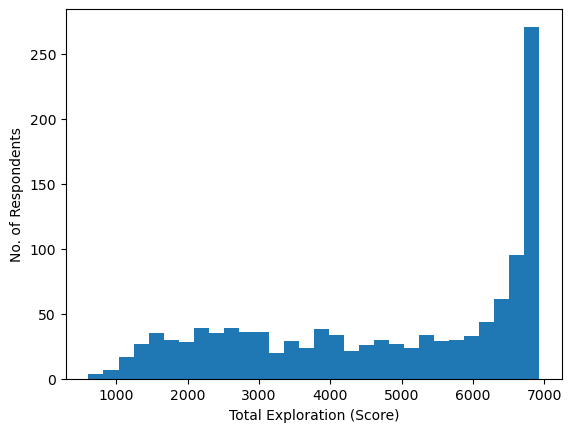

In [185]:
plt.hist(df.total_explored, bins=30)
plt.xlabel("Total Exploration (Score)")
plt.ylabel("No. of Respondents")
plt.show()

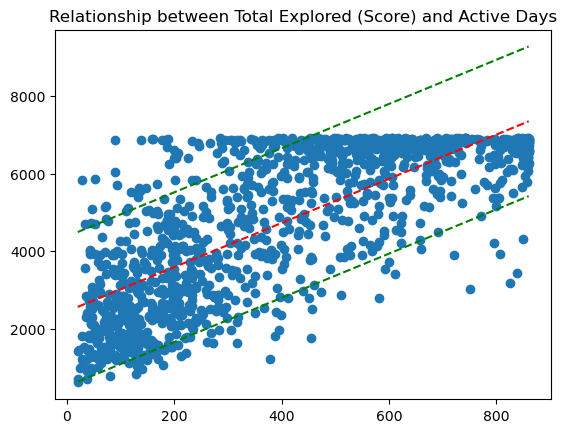

In [186]:
x = df.days_active.tolist()
y = df.total_explored.tolist()
plt.scatter(x, y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.plot(x,p(x)+np.std(df.total_explored.tolist()),"g--")
plt.plot(x,p(x)-np.std(df.total_explored.tolist()),"g--")
plt.title("Relationship between Total Explored (Score) and Active Days")
plt.show()

                            OLS Regression Results                            
Dep. Variable:         total_explored   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     634.9
Date:                Fri, 17 Feb 2023   Prob (F-statistic):          4.99e-247
Time:                        23:41:51   Log-Likelihood:                -10237.
No. Observations:                1203   AIC:                         2.048e+04
Df Residuals:                    1199   BIC:                         2.050e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2.861e+06 

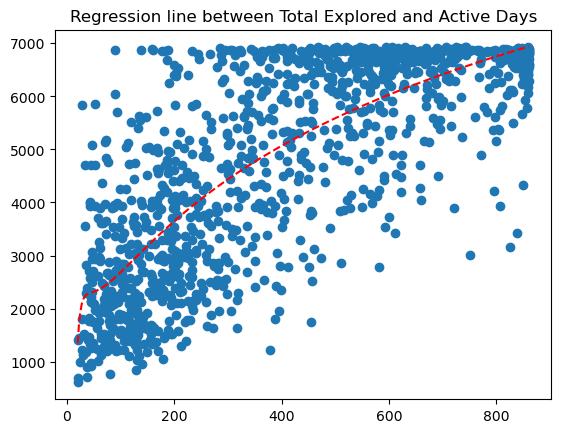

In [187]:
# df[['days_active','days_active^2','1/days_active','log(days_active)','sigmoid(days_active)']]
f = df.sort_values(by=['days_active'])
y_sm = df.total_explored
x_sm = df[['1/days_active','log(days_active)','sigmoid(days_active)']]
x_sm = sm.add_constant(x_sm)
model = sm.OLS(y_sm, x_sm)
results = model.fit()
ypred = results.predict(x_sm)
print(results.summary())

plt.scatter(df.days_active, y_sm, label='data')
plt.plot(x,ypred,"r--")
plt.title("Regression line between Total Explored and Active Days")
plt.show()

In [188]:
asia_list = df[df['server'] == 'asia'].total_explored.tolist()
euro_list = df[df['server'] == 'euro'].total_explored.tolist()
usa_list = df[df['server'] == 'usa'].total_explored.tolist()
f, p = f_oneway(asia_list, euro_list, usa_list)

print('asia','range:',min(asia_list),'-',max(asia_list),'mean:',sum(asia_list)/len(asia_list))
print('euro','range:',min(euro_list),'-',max(euro_list),'mean:',sum(euro_list)/len(euro_list))
print('usa ','range:',min(usa_list),'-',max(usa_list),'mean:',sum(usa_list)/len(usa_list))

if p <= 0.05:
    print(p, 'significant difference between server')
else:
    print(p, 'no significant difference between server')

asia range: 698 - 6930 mean: 4709.689578713969
euro range: 701 - 6930 mean: 4950.382920110193
usa  range: 607 - 6930 mean: 4616.843187660668
0.05114637508877799 no significant difference between server


<b>Total Culi</b><br>
Total number of Culi collected in the game.<br>
Max is 613.

In [189]:
df.culi.describe()

count    1203.000000
mean      423.036575
std       170.657865
min        18.000000
25%       278.500000
50%       461.000000
75%       588.000000
max       613.000000
Name: culi, dtype: float64

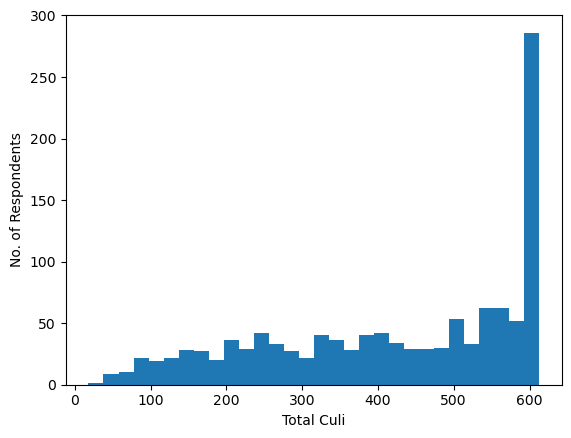

In [190]:
plt.hist(df.culi, bins=30)
plt.xlabel("Total Culi")
plt.ylabel("No. of Respondents")
plt.show()

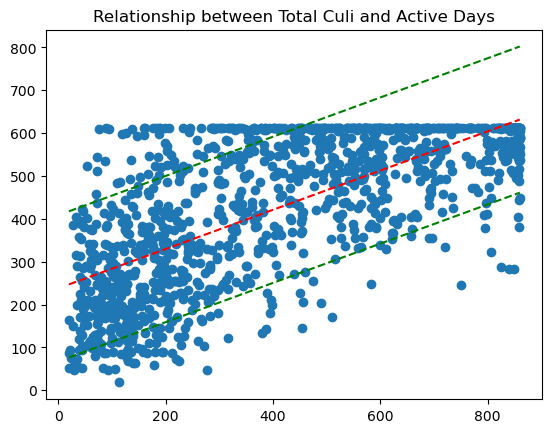

In [191]:
x = df.days_active.tolist()
y = df.culi.tolist()
plt.scatter(x, y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.plot(x,p(x)+np.std(df.culi.tolist()),"g--")
plt.plot(x,p(x)-np.std(df.culi.tolist()),"g--")
plt.title("Relationship between Total Culi and Active Days")
plt.show()

                            OLS Regression Results                            
Dep. Variable:                   culi   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     628.3
Date:                Fri, 17 Feb 2023   Prob (F-statistic):          2.04e-187
Time:                        23:41:51   Log-Likelihood:                -7458.6
No. Observations:                1203   AIC:                         1.492e+04
Df Residuals:                    1200   BIC:                         1.494e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 6862.2656 

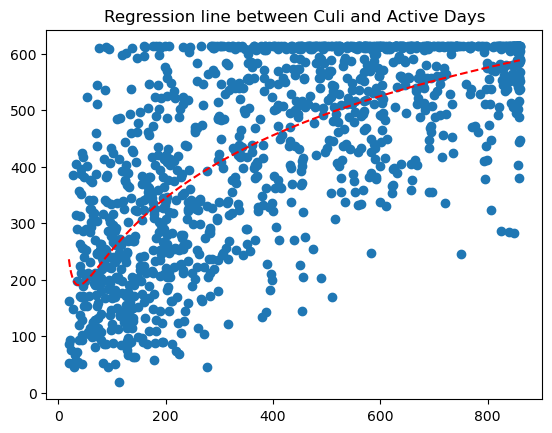

In [192]:
# df[['days_active','days_active^2','1/days_active','log(days_active)','sigmoid(days_active)']]
f = df.sort_values(by=['days_active'])
y_sm = df.culi
x_sm = df[['log(days_active)','sigmoid(days_active)']]
x_sm = sm.add_constant(x_sm)
model = sm.OLS(y_sm, x_sm)
results = model.fit()
ypred = results.predict(x_sm)
print(results.summary())

plt.scatter(df.days_active, y_sm, label='data')
plt.plot(x,ypred,"r--")
plt.title("Regression line between Culi and Active Days")
plt.show()

In [193]:
asia_list = df[df['server'] == 'asia'].culi.tolist()
euro_list = df[df['server'] == 'euro'].culi.tolist()
usa_list = df[df['server'] == 'usa'].culi.tolist()
f, p = f_oneway(asia_list, euro_list, usa_list)

print('asia','range:',min(asia_list),'-',max(asia_list),'mean:',sum(asia_list)/len(asia_list))
print('euro','range:',min(euro_list),'-',max(euro_list),'mean:',sum(euro_list)/len(euro_list))
print('usa ','range:',min(usa_list),'-',max(usa_list),'mean:',sum(usa_list)/len(usa_list))

if p <= 0.05:
    print(p, 'significant difference between server')
else:
    print(p, 'no significant difference between server')

asia range: 46 - 613 mean: 419.3392461197339
euro range: 18 - 613 mean: 438.3333333333333
usa  range: 46 - 613 mean: 413.0488431876607
0.10745438917062827 no significant difference between server


<b>Chests, waypoints and domains in open world</b><br>
- Common Chests<br>
- Exquisite Chests<br>
- Precious Chests<br>
- Luxurious Chests<br>
- Remarkable Chests<br>
- Unlocked Waypoints<br>
- Unlocked Domains

In [194]:
df.common_chests.describe()

count    1203.000000
mean     1296.145470
std       758.790635
min        81.000000
25%       544.000000
50%      1291.000000
75%      2031.500000
max      2526.000000
Name: common_chests, dtype: float64

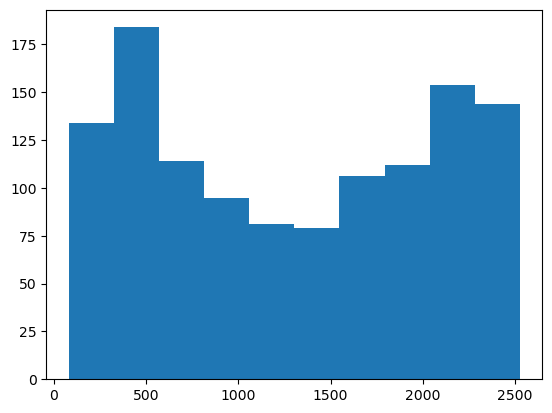

In [195]:
plt.hist(df.common_chests, bins=10)
plt.show()

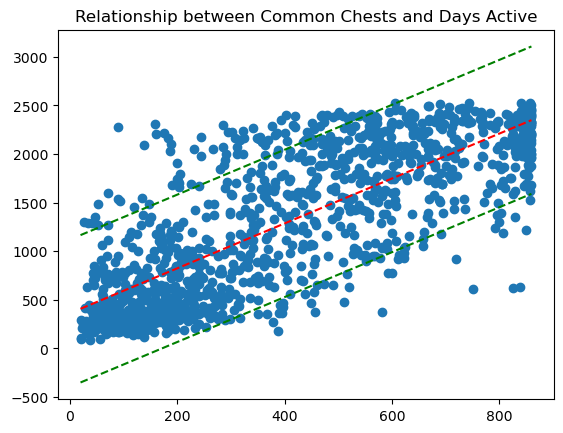

In [196]:
x = df.days_active.tolist()
y = df.common_chests.tolist()
plt.scatter(x, y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.plot(x,p(x)+np.std(df.common_chests.tolist()),"g--")
plt.plot(x,p(x)-np.std(df.common_chests.tolist()),"g--")
plt.title("Relationship between Common Chests and Days Active")
plt.show()

                            OLS Regression Results                            
Dep. Variable:          common_chests   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     680.9
Date:                Fri, 17 Feb 2023   Prob (F-statistic):          2.49e-258
Time:                        23:41:51   Log-Likelihood:                -9086.2
No. Observations:                1203   AIC:                         1.818e+04
Df Residuals:                    1199   BIC:                         1.820e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.735e+06 

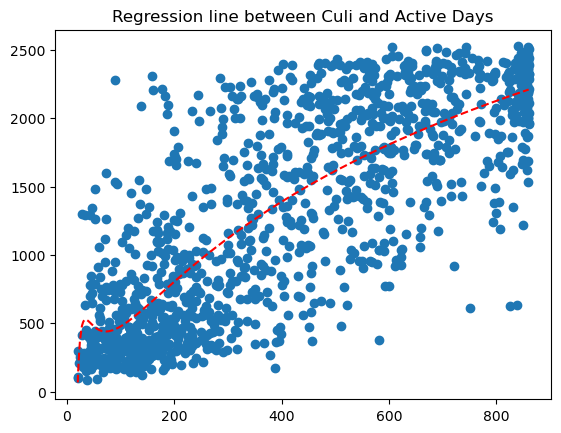

In [197]:
# df[['days_active','days_active^2','1/days_active','log(days_active)','sigmoid(days_active)']]
f = df.sort_values(by=['days_active'])
y_sm = df.common_chests
x_sm = df[['1/days_active','log(days_active)','sigmoid(days_active)']]
x_sm = sm.add_constant(x_sm)
model = sm.OLS(y_sm, x_sm)
results = model.fit()
ypred = results.predict(x_sm)
print(results.summary())

plt.scatter(df.days_active, y_sm, label='data')
plt.plot(x,ypred,"r--")
plt.title("Regression line between Culi and Active Days")
plt.show()

In [198]:
asia_list = df[df['server'] == 'asia'].common_chests.tolist()
euro_list = df[df['server'] == 'euro'].common_chests.tolist()
usa_list = df[df['server'] == 'usa'].common_chests.tolist()
f, p = f_oneway(asia_list, euro_list, usa_list)

print('asia','range:',min(asia_list),'-',max(asia_list),'mean:',sum(asia_list)/len(asia_list))
print('euro','range:',min(euro_list),'-',max(euro_list),'mean:',sum(euro_list)/len(euro_list))
print('usa ','range:',min(usa_list),'-',max(usa_list),'mean:',sum(usa_list)/len(usa_list))

if p <= 0.05:
    print(p, 'significant difference between server')
else:
    print(p, 'no significant difference between server')

asia range: 110 - 2526 mean: 1280.5764966740576
euro range: 81 - 2525 mean: 1378.0192837465565
usa  range: 92 - 2489 mean: 1237.7943444730076
0.0346636526746264 significant difference between server


In [199]:
df.exquisite_chests.describe()

count    1203.000000
mean      914.184539
std       459.664067
min        64.000000
25%       461.000000
50%       967.000000
75%      1350.000000
max      1588.000000
Name: exquisite_chests, dtype: float64

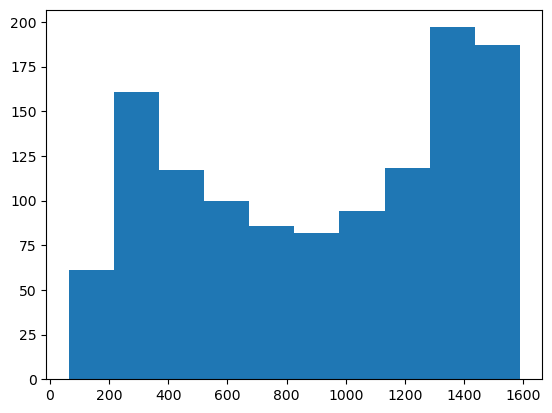

In [200]:
plt.hist(df.exquisite_chests, bins=10)
plt.show()

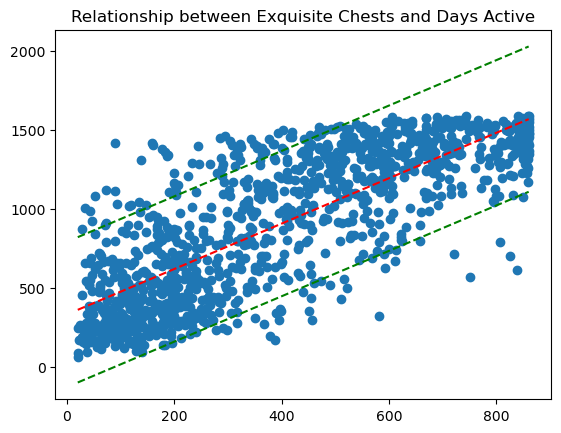

In [201]:
x = df.days_active.tolist()
y = df.exquisite_chests.tolist()
plt.scatter(x, y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.plot(x,p(x)+np.std(df.exquisite_chests.tolist()),"g--")
plt.plot(x,p(x)-np.std(df.exquisite_chests.tolist()),"g--")
plt.title("Relationship between Exquisite Chests and Days Active")
plt.show()

In [202]:
df.precious_chests.describe()

count    1203.000000
mean      278.233583
std       135.178791
min        27.000000
25%       151.000000
50%       281.000000
75%       403.000000
max       486.000000
Name: precious_chests, dtype: float64

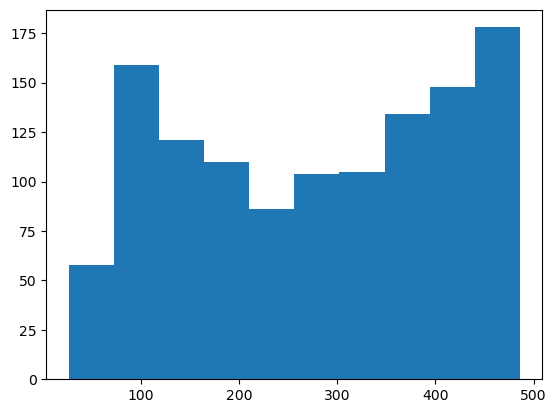

In [203]:
plt.hist(df.precious_chests, bins=10)
plt.show()

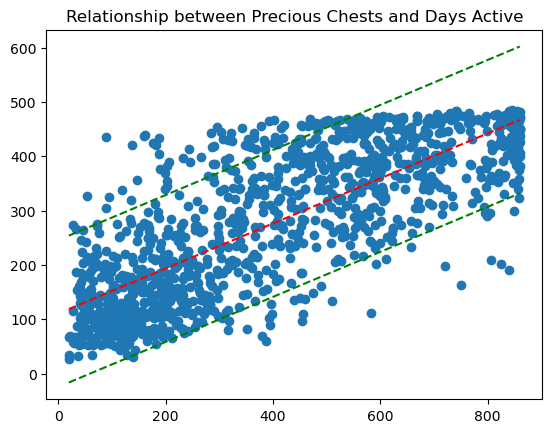

In [204]:
x = df.days_active.tolist()
y = df.precious_chests.tolist()
plt.scatter(x, y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.plot(x,p(x)+np.std(df.precious_chests.tolist()),"g--")
plt.plot(x,p(x)-np.std(df.precious_chests.tolist()),"g--")
plt.title("Relationship between Precious Chests and Days Active")
plt.show()

In [205]:
asia_list = df[df['server'] == 'asia'].precious_chests.tolist()
euro_list = df[df['server'] == 'euro'].precious_chests.tolist()
usa_list = df[df['server'] == 'usa'].precious_chests.tolist()
f, p = f_oneway(asia_list, euro_list, usa_list)

print('asia','range:',min(asia_list),'-',max(asia_list),'mean:',sum(asia_list)/len(asia_list))
print('euro','range:',min(euro_list),'-',max(euro_list),'mean:',sum(euro_list)/len(euro_list))
print('usa ','range:',min(usa_list),'-',max(usa_list),'mean:',sum(usa_list)/len(usa_list))

if p <= 0.05:
    print(p, 'significant difference between server')
else:
    print(p, 'no significant difference between server')

asia range: 34 - 486 mean: 279.1086474501109
euro range: 32 - 484 mean: 291.3801652892562
usa  range: 27 - 484 mean: 264.9511568123393
0.027084810460129387 significant difference between server


In [206]:
df.luxurious_chests.describe()

count    1203.000000
mean      109.562760
std        50.815594
min        10.000000
25%        63.000000
50%       114.000000
75%       158.000000
max       186.000000
Name: luxurious_chests, dtype: float64

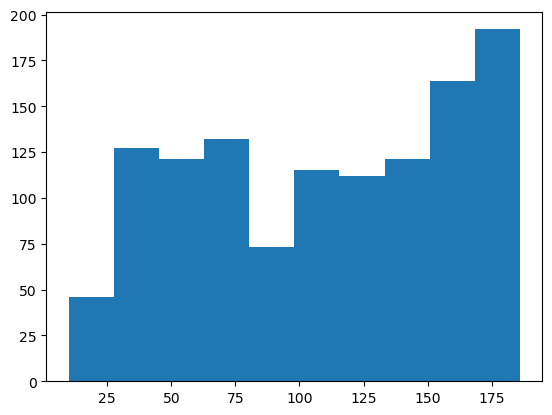

In [207]:
plt.hist(df.luxurious_chests, bins=10)
plt.show()

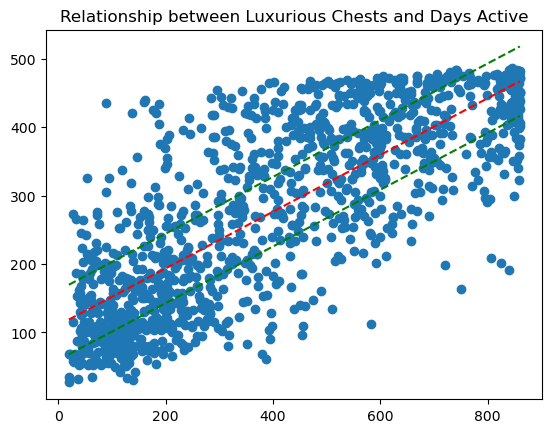

In [208]:
x = df.days_active.tolist()
y = df.precious_chests.tolist()
plt.scatter(x, y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.plot(x,p(x)+np.std(df.luxurious_chests.tolist()),"g--")
plt.plot(x,p(x)-np.std(df.luxurious_chests.tolist()),"g--")
plt.title("Relationship between Luxurious Chests and Days Active")
plt.show()

In [209]:
asia_list = df[df['server'] == 'asia'].luxurious_chests.tolist()
euro_list = df[df['server'] == 'euro'].luxurious_chests.tolist()
usa_list = df[df['server'] == 'usa'].luxurious_chests.tolist()
f, p = f_oneway(asia_list, euro_list, usa_list)

print('asia','range:',min(asia_list),'-',max(asia_list),'mean:',sum(asia_list)/len(asia_list))
print('euro','range:',min(euro_list),'-',max(euro_list),'mean:',sum(euro_list)/len(euro_list))
print('usa ','range:',min(usa_list),'-',max(usa_list),'mean:',sum(usa_list)/len(usa_list))

if p <= 0.05:
    print(p, 'significant difference between server')
else:
    print(p, 'no significant difference between server')

asia range: 15 - 185 mean: 109.71175166297118
euro range: 15 - 186 mean: 114.633608815427
usa  range: 10 - 184 mean: 104.65809768637533
0.026618587303324396 significant difference between server


In [210]:
df.remarkable_chests.describe()

count    1203.000000
mean       63.924356
std        51.936398
min         0.000000
25%        12.000000
50%        56.000000
75%       115.500000
max       146.000000
Name: remarkable_chests, dtype: float64

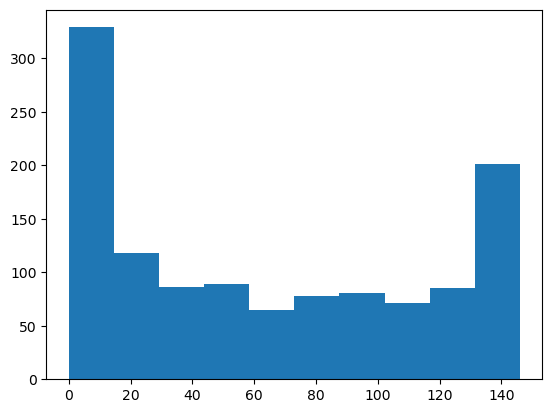

In [211]:
plt.hist(df.remarkable_chests, bins=10)
plt.show()

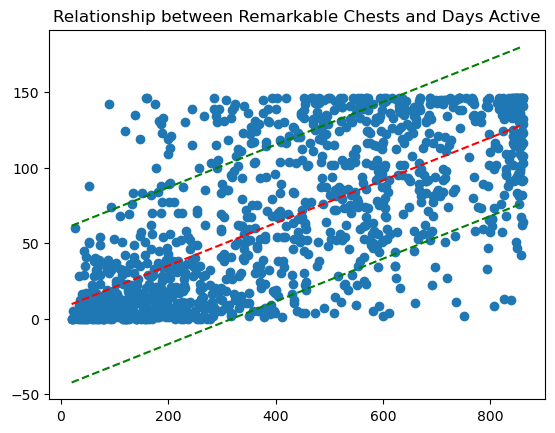

In [212]:
x = df.days_active.tolist()
y = df.remarkable_chests.tolist()
plt.scatter(x, y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.plot(x,p(x)+np.std(df.remarkable_chests.tolist()),"g--")
plt.plot(x,p(x)-np.std(df.remarkable_chests.tolist()),"g--")
plt.title("Relationship between Remarkable Chests and Days Active")
plt.show()

In [213]:
asia_list = df[df['server'] == 'asia'].remarkable_chests.tolist()
euro_list = df[df['server'] == 'euro'].remarkable_chests.tolist()
usa_list = df[df['server'] == 'usa'].remarkable_chests.tolist()
f, p = f_oneway(asia_list, euro_list, usa_list)

print('asia','range:',min(asia_list),'-',max(asia_list),'mean:',sum(asia_list)/len(asia_list))
print('euro','range:',min(euro_list),'-',max(euro_list),'mean:',sum(euro_list)/len(euro_list))
print('usa ','range:',min(usa_list),'-',max(usa_list),'mean:',sum(usa_list)/len(usa_list))

if p <= 0.05:
    print(p, 'significant difference between server')
else:
    print(p, 'no significant difference between server')

asia range: 0 - 146 mean: 62.97560975609756
euro range: 0 - 146 mean: 69.98898071625344
usa  range: 0 - 146 mean: 59.365038560411314
0.0173198071787413 significant difference between server


In [214]:
df.unlocked_waypoints.describe()

count    1203.000000
mean      246.875312
std        46.514622
min        71.000000
25%       224.000000
50%       265.000000
75%       286.000000
max       295.000000
Name: unlocked_waypoints, dtype: float64

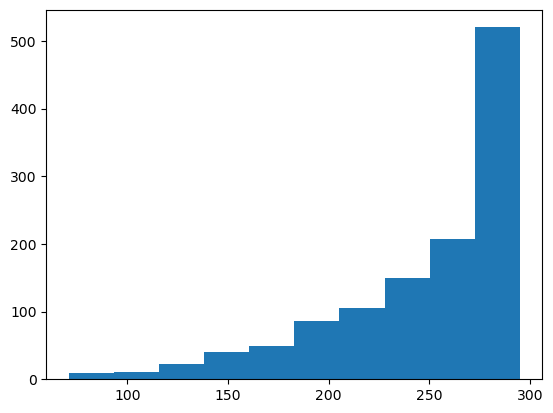

In [215]:
plt.hist(df.unlocked_waypoints, bins=10)
plt.show()

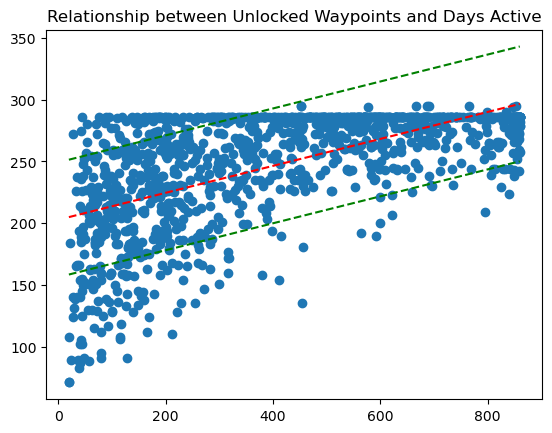

In [216]:
x = df.days_active.tolist()
y = df.unlocked_waypoints.tolist()
plt.scatter(x, y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.plot(x,p(x)+np.std(df.unlocked_waypoints.tolist()),"g--")
plt.plot(x,p(x)-np.std(df.unlocked_waypoints.tolist()),"g--")
plt.title("Relationship between Unlocked Waypoints and Days Active")
plt.show()

In [217]:
asia_list = df[df['server'] == 'asia'].unlocked_waypoints.tolist()
euro_list = df[df['server'] == 'euro'].unlocked_waypoints.tolist()
usa_list = df[df['server'] == 'usa'].unlocked_waypoints.tolist()
f, p = f_oneway(asia_list, euro_list, usa_list)

print('asia','range:',min(asia_list),'-',max(asia_list),'mean:',sum(asia_list)/len(asia_list))
print('euro','range:',min(euro_list),'-',max(euro_list),'mean:',sum(euro_list)/len(euro_list))
print('usa ','range:',min(usa_list),'-',max(usa_list),'mean:',sum(usa_list)/len(usa_list))

if p <= 0.05:
    print(p, 'significant difference between server')
else:
    print(p, 'no significant difference between server')

asia range: 71 - 295 mean: 246.9889135254989
euro range: 83 - 295 mean: 249.87052341597797
usa  range: 71 - 295 mean: 243.94858611825194
0.21798125499278467 no significant difference between server


In [218]:
df.unlocked_domains.describe()

count    1203.000000
mean       40.073150
std         7.971641
min        14.000000
25%        35.000000
50%        43.000000
75%        46.000000
max        49.000000
Name: unlocked_domains, dtype: float64

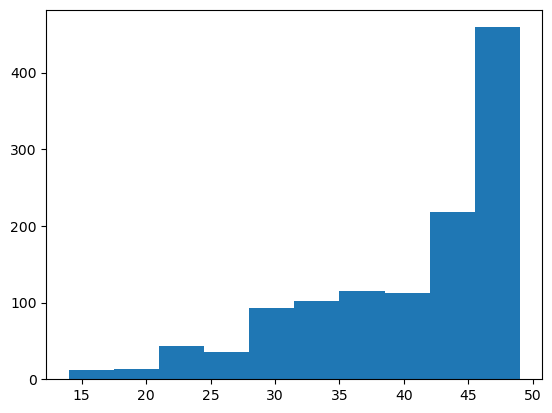

In [219]:
plt.hist(df.unlocked_domains, bins=10)
plt.show()

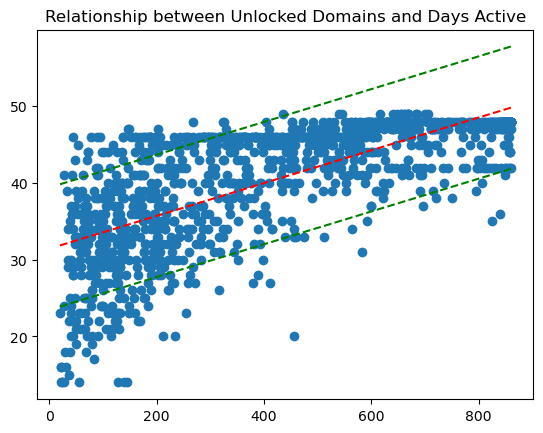

In [220]:
x = df.days_active.tolist()
y = df.unlocked_domains.tolist()
plt.scatter(x, y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.plot(x,p(x)+np.std(df.unlocked_domains.tolist()),"g--")
plt.plot(x,p(x)-np.std(df.unlocked_domains.tolist()),"g--")
plt.title("Relationship between Unlocked Domains and Days Active")
plt.show()

In [221]:
asia_list = df[df['server'] == 'asia'].unlocked_domains.tolist()
euro_list = df[df['server'] == 'euro'].unlocked_domains.tolist()
usa_list = df[df['server'] == 'usa'].unlocked_domains.tolist()
f, p = f_oneway(asia_list, euro_list, usa_list)

print('asia','range:',min(asia_list),'-',max(asia_list),'mean:',sum(asia_list)/len(asia_list))
print('euro','range:',min(euro_list),'-',max(euro_list),'mean:',sum(euro_list)/len(euro_list))
print('usa ','range:',min(usa_list),'-',max(usa_list),'mean:',sum(usa_list)/len(usa_list))

if p <= 0.05:
    print(p, 'significant difference between server')
else:
    print(p, 'no significant difference between server')

asia range: 14 - 49 mean: 40.25720620842572
euro range: 15 - 49 mean: 40.46831955922865
usa  range: 14 - 49 mean: 39.491002570694086
0.20129896511647624 no significant difference between server


<b>Teapot</b><br>
- Teapot Level
- Teapot Visitors
- Teapot Comfort
- Teapot Items
- Floating Abode
- Emerald Peak
- Cool Isle
- Silken Courtyard
- Sublime Spicewood

In [222]:
df.teapot_level.describe()

count    1203.000000
mean        7.501247
std         3.350162
min         1.000000
25%         4.000000
50%        10.000000
75%        10.000000
max        10.000000
Name: teapot_level, dtype: float64

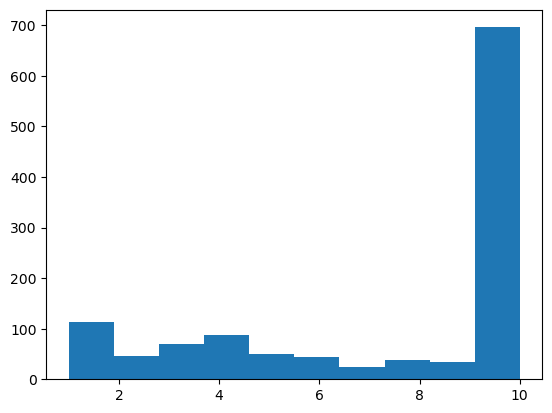

In [223]:
plt.hist(df.teapot_level, bins=10)
plt.show()

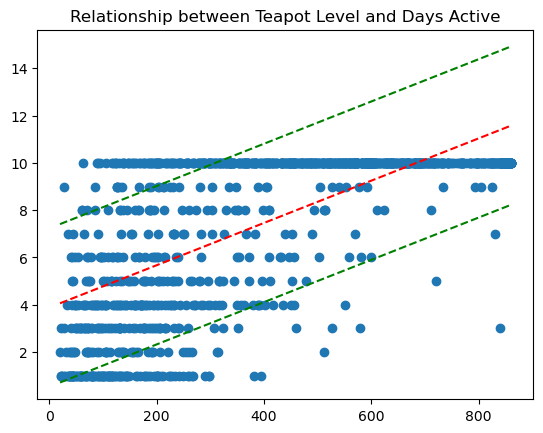

In [224]:
x = df.days_active.tolist()
y = df.teapot_level.tolist()
plt.scatter(x, y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.plot(x,p(x)+np.std(df.teapot_level.tolist()),"g--")
plt.plot(x,p(x)-np.std(df.teapot_level.tolist()),"g--")
plt.title("Relationship between Teapot Level and Days Active")
plt.show()

In [225]:
asia_list = df[df['server'] == 'asia'].teapot_level.tolist()
euro_list = df[df['server'] == 'euro'].teapot_level.tolist()
usa_list = df[df['server'] == 'usa'].teapot_level.tolist()
f, p = f_oneway(asia_list, euro_list, usa_list)

print('asia','range:',min(asia_list),'-',max(asia_list),'mean:',sum(asia_list)/len(asia_list))
print('euro','range:',min(euro_list),'-',max(euro_list),'mean:',sum(euro_list)/len(euro_list))
print('usa ','range:',min(usa_list),'-',max(usa_list),'mean:',sum(usa_list)/len(usa_list))

if p <= 0.05:
    print(p, 'significant difference between server')
else:
    print(p, 'no significant difference between server')

asia range: 1 - 10 mean: 7.450110864745011
euro range: 1 - 10 mean: 7.760330578512397
usa  range: 1 - 10 mean: 7.318766066838046
0.1800209622893098 no significant difference between server


In [226]:
df.teapot_visitors.describe()

count    1203.000000
mean       13.068994
std        21.193139
min         0.000000
25%         1.000000
50%         4.000000
75%        16.000000
max       188.000000
Name: teapot_visitors, dtype: float64

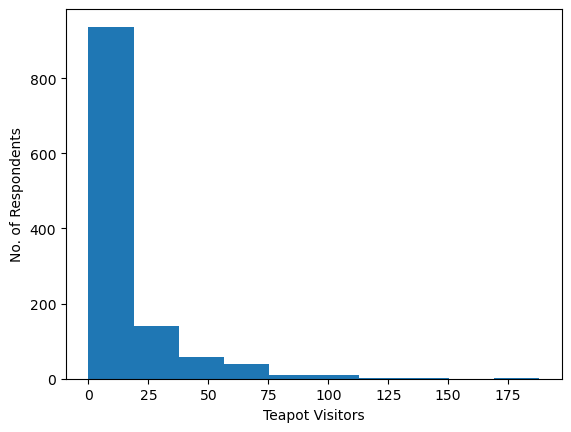

In [227]:
plt.hist(df.teapot_visitors, bins=10)
plt.xlabel("Teapot Visitors")
plt.ylabel("No. of Respondents")
plt.show()

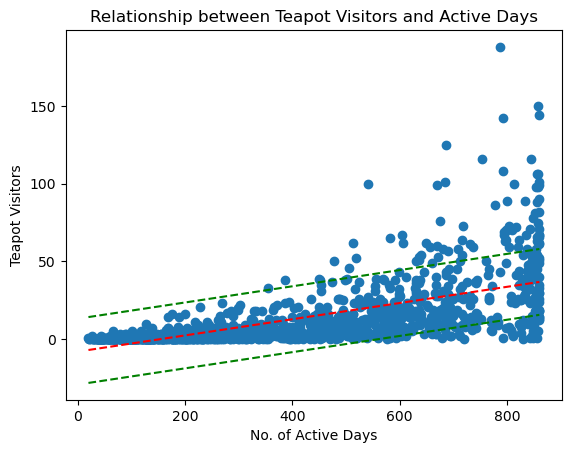

In [228]:
x = df.days_active.tolist()
y = df.teapot_visitors.tolist()
plt.scatter(x, y)
plt.xlabel("No. of Active Days")
plt.ylabel("Teapot Visitors")
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.plot(x,p(x)+np.std(df.teapot_visitors.tolist()),"g--")
plt.plot(x,p(x)-np.std(df.teapot_visitors.tolist()),"g--")
plt.title("Relationship between Teapot Visitors and Active Days")
plt.show()

In [229]:
asia_list = df[df['server'] == 'asia'].teapot_visitors.tolist()
euro_list = df[df['server'] == 'euro'].teapot_visitors.tolist()
usa_list = df[df['server'] == 'usa'].teapot_visitors.tolist()
f, p = f_oneway(asia_list, euro_list, usa_list)

print('asia','range:',min(asia_list),'-',max(asia_list),'mean:',sum(asia_list)/len(asia_list))
print('euro','range:',min(euro_list),'-',max(euro_list),'mean:',sum(euro_list)/len(euro_list))
print('usa ','range:',min(usa_list),'-',max(usa_list),'mean:',sum(usa_list)/len(usa_list))

if p <= 0.05:
    print(p, 'significant difference between server')
else:
    print(p, 'no significant difference between server')

asia range: 0 - 188 mean: 15.361419068736142
euro range: 0 - 144 mean: 12.575757575757576
usa  range: 0 - 101 mean: 10.87146529562982
0.007911901956461687 significant difference between server


In [230]:
df.teapot_comfort.describe()

count     1203.000000
mean     15019.600998
std      10009.880011
min       1800.000000
25%       4925.000000
50%      15610.000000
75%      22150.000000
max      68240.000000
Name: teapot_comfort, dtype: float64

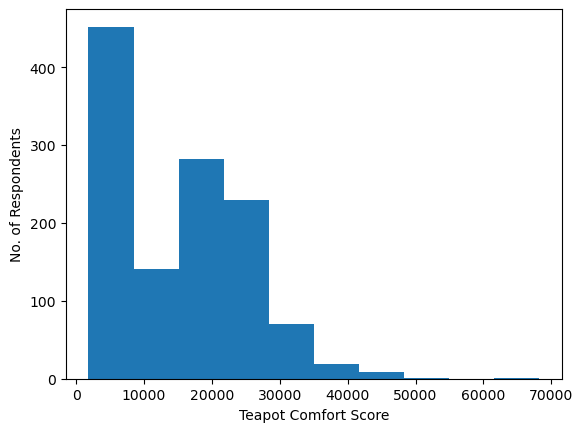

In [231]:
plt.hist(df.teapot_comfort, bins=10)
plt.xlabel("Teapot Comfort Score")
plt.ylabel("No. of Respondents")
plt.show()

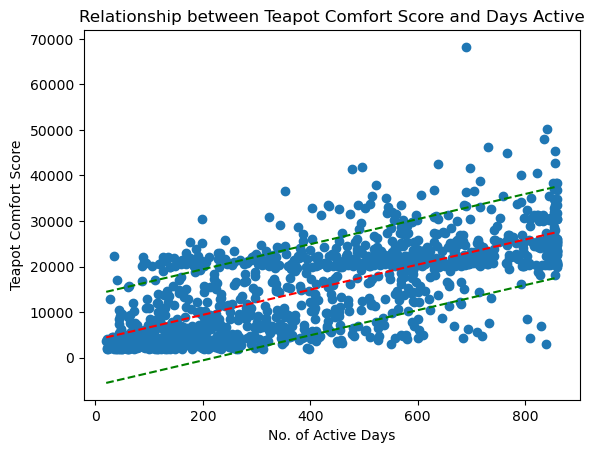

In [232]:
x = df.days_active.tolist()
y = df.teapot_comfort.tolist()
plt.scatter(x, y)
plt.xlabel("No. of Active Days")
plt.ylabel("Teapot Comfort Score")
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.plot(x,p(x)+np.std(df.teapot_comfort.tolist()),"g--")
plt.plot(x,p(x)-np.std(df.teapot_comfort.tolist()),"g--")
plt.title("Relationship between Teapot Comfort Score and Days Active")
plt.show()

In [233]:
asia_list = df[df['server'] == 'asia'].teapot_comfort.tolist()
euro_list = df[df['server'] == 'euro'].teapot_comfort.tolist()
usa_list = df[df['server'] == 'usa'].teapot_comfort.tolist()
f, p = f_oneway(asia_list, euro_list, usa_list)

print('asia','range:',min(asia_list),'-',max(asia_list),'mean:',sum(asia_list)/len(asia_list))
print('euro','range:',min(euro_list),'-',max(euro_list),'mean:',sum(euro_list)/len(euro_list))
print('usa ','range:',min(usa_list),'-',max(usa_list),'mean:',sum(usa_list)/len(usa_list))

if p <= 0.05:
    print(p, 'significant difference between server')
else:
    print(p, 'no significant difference between server')

asia range: 1800 - 50190 mean: 15108.935698447893
euro range: 1800 - 68240 mean: 15739.69696969697
usa  range: 1800 - 48120 mean: 14244.061696658098
0.11943202570629988 no significant difference between server


In [234]:
df.teapot_items.describe()

count    1203.000000
mean      927.616791
std       908.733378
min         3.000000
25%       239.000000
50%       659.000000
75%      1354.000000
max      7172.000000
Name: teapot_items, dtype: float64

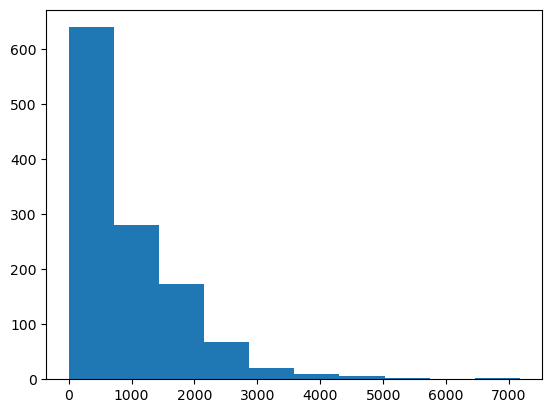

In [235]:
plt.hist(df.teapot_items, bins=10)
plt.show()

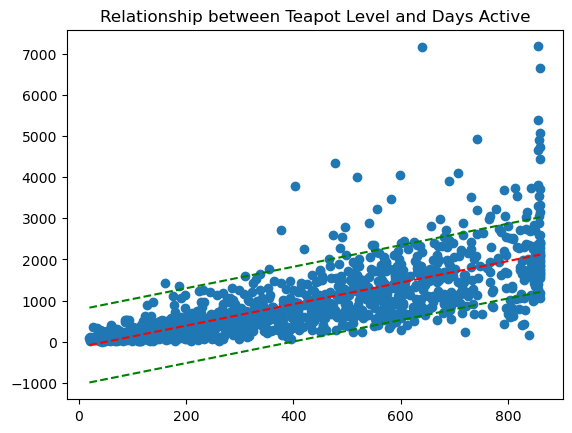

In [236]:
x = df.days_active.tolist()
y = df.teapot_items.tolist()
plt.scatter(x, y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.plot(x,p(x)+np.std(df.teapot_items.tolist()),"g--")
plt.plot(x,p(x)-np.std(df.teapot_items.tolist()),"g--")
plt.title("Relationship between Teapot Level and Days Active")
plt.show()

In [237]:
asia_list = df[df['server'] == 'asia'].teapot_items.tolist()
euro_list = df[df['server'] == 'euro'].teapot_items.tolist()
usa_list = df[df['server'] == 'usa'].teapot_items.tolist()
f, p = f_oneway(asia_list, euro_list, usa_list)

print('asia','range:',min(asia_list),'-',max(asia_list),'mean:',sum(asia_list)/len(asia_list))
print('euro','range:',min(euro_list),'-',max(euro_list),'mean:',sum(euro_list)/len(euro_list))
print('usa ','range:',min(usa_list),'-',max(usa_list),'mean:',sum(usa_list)/len(usa_list))

if p <= 0.05:
    print(p, 'significant difference between server')
else:
    print(p, 'no significant difference between server')

asia range: 15 - 4906 mean: 924.019955654102
euro range: 3 - 5063 mean: 979.5454545454545
usa  range: 14 - 7172 mean: 883.3290488431877
0.3473751463155243 no significant difference between server


In [238]:
df.teapot_realm.value_counts()

1    404
5    292
4    241
3    149
2    117
Name: teapot_realm, dtype: int64

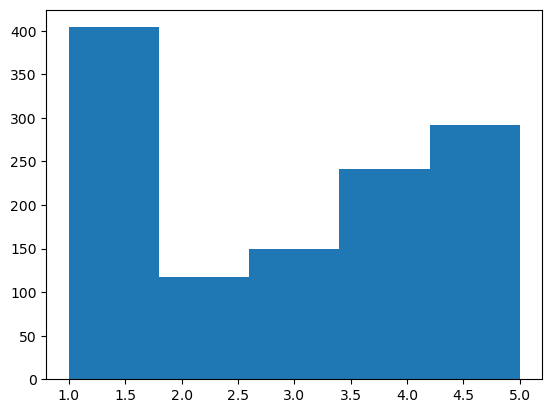

In [239]:
plt.hist(df.teapot_realm, bins=5)
plt.show()

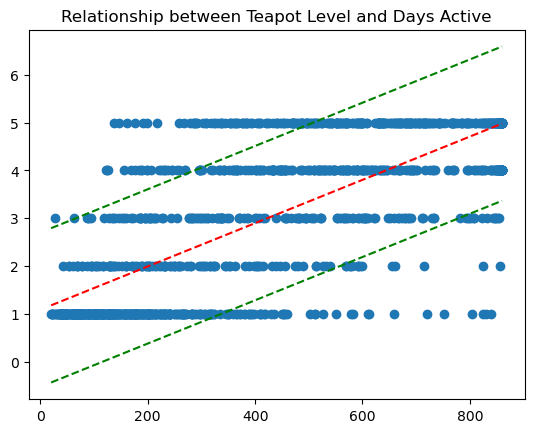

In [240]:
x = df.days_active.tolist()
y = df.teapot_realm.tolist()
plt.scatter(x, y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.plot(x,p(x)+np.std(df.teapot_realm.tolist()),"g--")
plt.plot(x,p(x)-np.std(df.teapot_realm.tolist()),"g--")
plt.title("Relationship between Teapot Level and Days Active")
plt.show()

In [241]:
asia_list = df[df['server'] == 'asia'].teapot_realm.tolist()
euro_list = df[df['server'] == 'euro'].teapot_realm.tolist()
usa_list = df[df['server'] == 'usa'].teapot_realm.tolist()
f, p = f_oneway(asia_list, euro_list, usa_list)

print('asia','range:',min(asia_list),'-',max(asia_list),'mean:',sum(asia_list)/len(asia_list))
print('euro','range:',min(euro_list),'-',max(euro_list),'mean:',sum(euro_list)/len(euro_list))
print('usa ','range:',min(usa_list),'-',max(usa_list),'mean:',sum(usa_list)/len(usa_list))

if p <= 0.05:
    print(p, 'significant difference between server')
else:
    print(p, 'no significant difference between server')

asia range: 1 - 5 mean: 2.8736141906873613
euro range: 1 - 5 mean: 3.0964187327823693
usa  range: 1 - 5 mean: 2.7994858611825193
0.03211951015052067 significant difference between server


<b>Spiral Abyss</b><br>

In [242]:
df.abyss_score1.describe()

count    1203.000000
mean       20.822111
std        13.899507
min         0.000000
25%         5.500000
50%        24.000000
75%        34.000000
max        36.000000
Name: abyss_score1, dtype: float64

In [243]:
df.abyss_score2.describe()

count    1203.000000
mean        5.980881
std         6.319197
min         0.000000
25%         0.000000
50%         3.000000
75%        13.000000
max        15.000000
Name: abyss_score2, dtype: float64

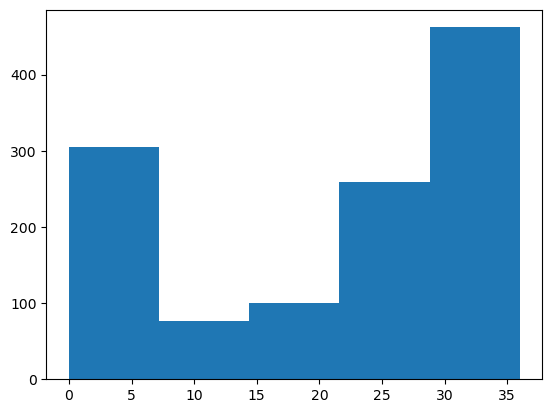

In [244]:
plt.hist(df.abyss_score1, bins=5)
plt.show()

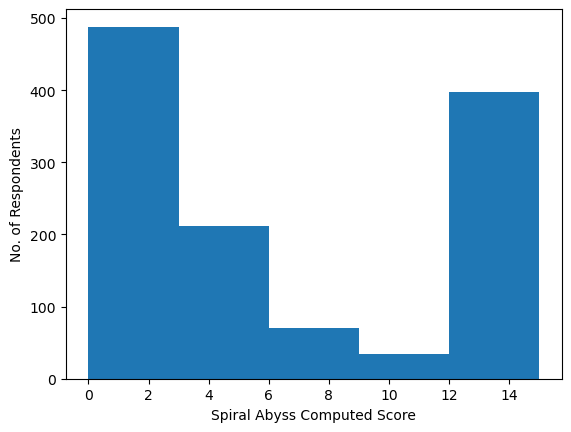

In [245]:
plt.hist(df.abyss_score2, bins=5)
plt.xlabel("Spiral Abyss Computed Score")
plt.ylabel("No. of Respondents")
plt.show()

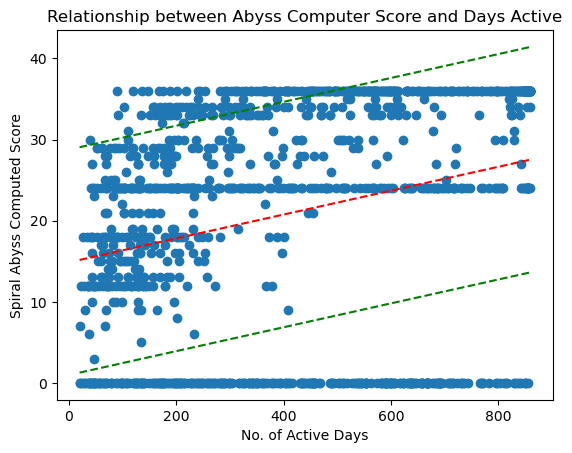

In [246]:
x = df.days_active.tolist()
y = df.abyss_score1.tolist()
plt.scatter(x, y)
plt.xlabel("No. of Active Days")
plt.ylabel("Spiral Abyss Computed Score")
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.plot(x,p(x)+np.std(df.abyss_score1.tolist()),"g--")
plt.plot(x,p(x)-np.std(df.abyss_score1.tolist()),"g--")
plt.title("Relationship between Abyss Computer Score and Days Active")
plt.show()

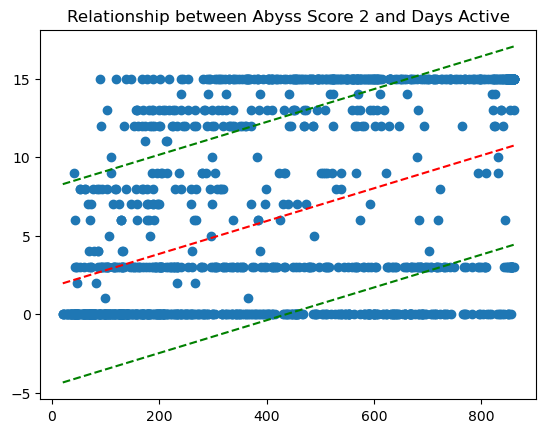

In [247]:
x = df.days_active.tolist()
y = df.abyss_score2.tolist()
plt.scatter(x, y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.plot(x,p(x)+np.std(df.abyss_score2.tolist()),"g--")
plt.plot(x,p(x)-np.std(df.abyss_score2.tolist()),"g--")
plt.title("Relationship between Abyss Score 2 and Days Active")
plt.show()

In [248]:
asia_list = df[df['server'] == 'asia'].abyss_score1.tolist()
euro_list = df[df['server'] == 'euro'].abyss_score1.tolist()
usa_list = df[df['server'] == 'usa'].abyss_score1.tolist()
f, p = f_oneway(asia_list, euro_list, usa_list)

print('asia','range:',min(asia_list),'-',max(asia_list),'mean:',sum(asia_list)/len(asia_list))
print('euro','range:',min(euro_list),'-',max(euro_list),'mean:',sum(euro_list)/len(euro_list))
print('usa ','range:',min(usa_list),'-',max(usa_list),'mean:',sum(usa_list)/len(usa_list))

if p <= 0.05:
    print(p, 'significant difference between server')
else:
    print(p, 'no significant difference between server')

asia range: 0 - 36 mean: 22.303769401330378
euro range: 0 - 36 mean: 19.52892561983471
usa  range: 0 - 36 mean: 20.311053984575835
0.012213353799909588 significant difference between server


In [249]:
asia_list = df[df['server'] == 'asia'].abyss_score2.tolist()
euro_list = df[df['server'] == 'euro'].abyss_score2.tolist()
usa_list = df[df['server'] == 'usa'].abyss_score2.tolist()
f, p = f_oneway(asia_list, euro_list, usa_list)

print('asia','range:',min(asia_list),'-',max(asia_list),'mean:',sum(asia_list)/len(asia_list))
print('euro','range:',min(euro_list),'-',max(euro_list),'mean:',sum(euro_list)/len(euro_list))
print('usa ','range:',min(usa_list),'-',max(usa_list),'mean:',sum(usa_list)/len(usa_list))

if p <= 0.05:
    print(p, 'significant difference between server')
else:
    print(p, 'no significant difference between server')

asia range: 0 - 15 mean: 6.5144124168514415
euro range: 0 - 15 mean: 5.663911845730028
usa  range: 0 - 15 mean: 5.658097686375322
0.07631912520935258 no significant difference between server


In [250]:
df_cluster = df[['level','achievements','days_active','characters','culi',
                 'common_chests','exquisite_chests','precious_chests','luxurious_chests',
                 'remarkable_chests','unlocked_waypoints','unlocked_domains','teapot_realm',
                 'teapot_visitors','teapot_comfort','teapot_items',
                 'total_explored','abyss_score1','total_5_characters','total_5_constellation',
                 'total_5_weapon','total_5_refinement']]

<b>Modelling using Hierarchical Method</b><br>

In [251]:
Z = linkage(df_cluster, 'single')
c, coph_dists = cophenet(Z, pdist(df_cluster))
c

0.4376170212880057

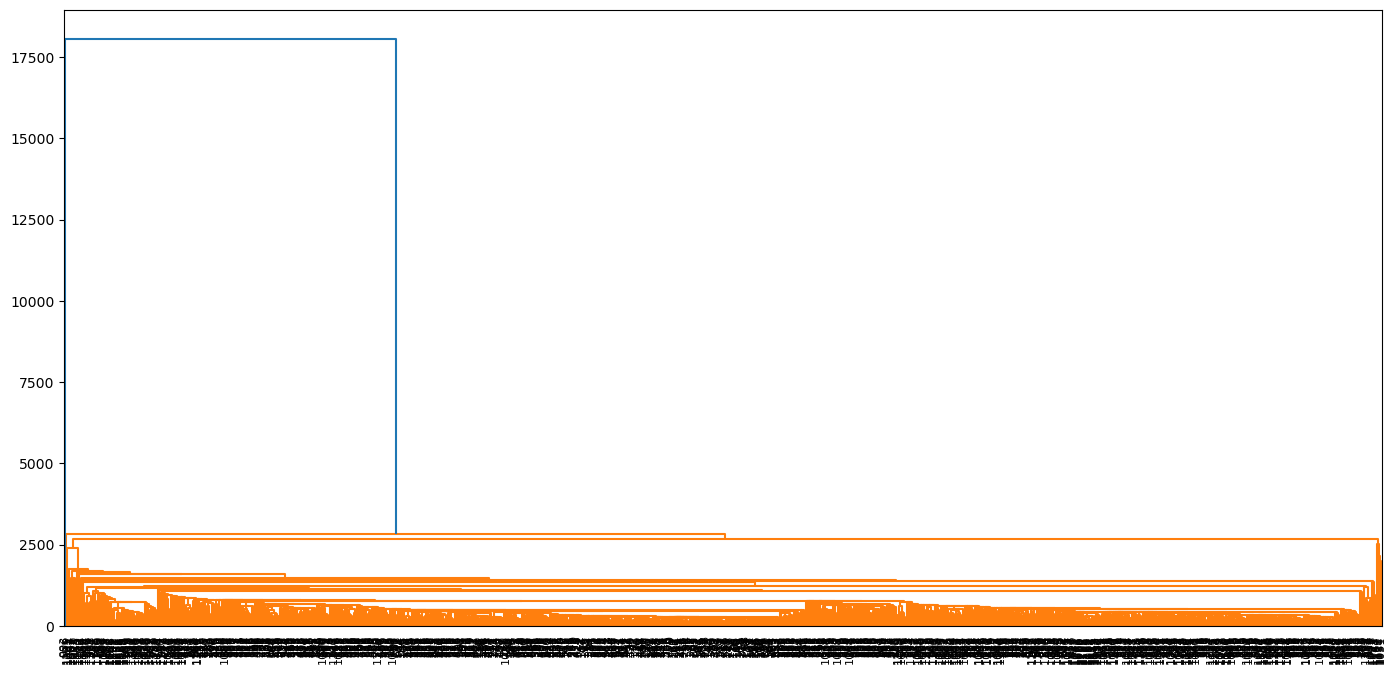

In [252]:
plt.figure(figsize=(17,8))
_ = dendrogram(Z, leaf_rotation=90., leaf_font_size=8.)

<b>Modelling using KMeans Method</b><br>

<b>KMeans Method</b>

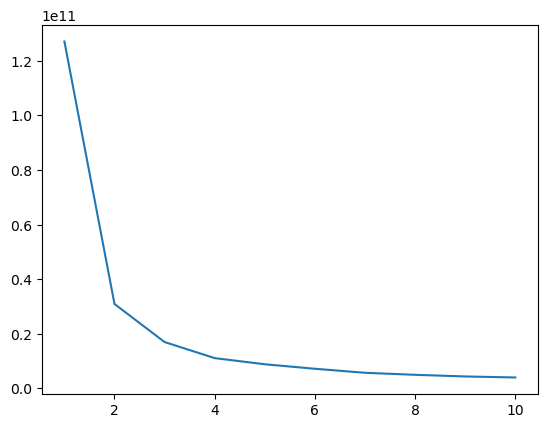

In [253]:
temp_list = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, n_init=4, random_state=0)
    kmeans.fit(df_cluster)
    temp_list.append(kmeans.inertia_)
plt.plot(range(1, 11), temp_list)
plt.show()

In [254]:
kmeans = KMeans(n_clusters=4, n_init=4, random_state=0)
kmeans.fit(df_cluster)
df_cluster['kmeans'] = kmeans.labels_
df_cluster.kmeans.value_counts()

1    462
3    448
0    191
2    102
Name: kmeans, dtype: int64

In [255]:
df_cluster.kmeans = df_cluster.kmeans.replace({0: 'Sophomore', 1: 'Junior', 2: 'Senior', 3: 'Freshman'})

F-stats: 187.8 p-value: 0.0 significant difference between clusters


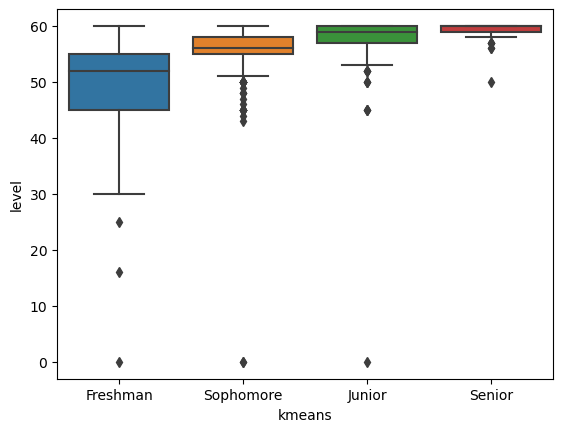

In [256]:
sns.boxplot(x = df_cluster.kmeans, y = df_cluster.level)
grps = pd.unique(df_cluster.kmeans.values)
d_data = {grp:df_cluster['level'][df_cluster.kmeans == grp] for grp in grps}
F, p = stats.f_oneway(d_data['Sophomore'], d_data['Junior'], d_data['Senior'], d_data['Freshman'])
if p <= 0.05:
    print('F-stats:', round(F,2), 'p-value:', round(p,2), 'significant difference between clusters')
else:
    print('F-stats:', round(F,2), 'p-value:', round(p,2),  'no significant difference between clusters')

F-stats: 735.58 p-value: 0.0 significant difference between clusters


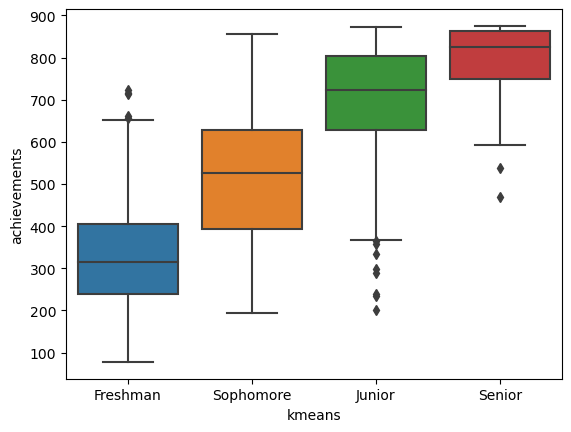

In [257]:
sns.boxplot(x = df_cluster.kmeans, y = df_cluster.achievements)
d_data = {grp:df_cluster['achievements'][df_cluster.kmeans == grp] for grp in grps}
F, p = stats.f_oneway(d_data['Sophomore'], d_data['Junior'], d_data['Senior'], d_data['Freshman'])
if p <= 0.05:
    print('F-stats:', round(F,2), 'p-value:', round(p,2), 'significant difference between clusters')
else:
    print('F-stats:', round(F,2), 'p-value:', round(p,2),  'no significant difference between clusters')

F-stats: 382.18 p-value: 0.0 significant difference between clusters


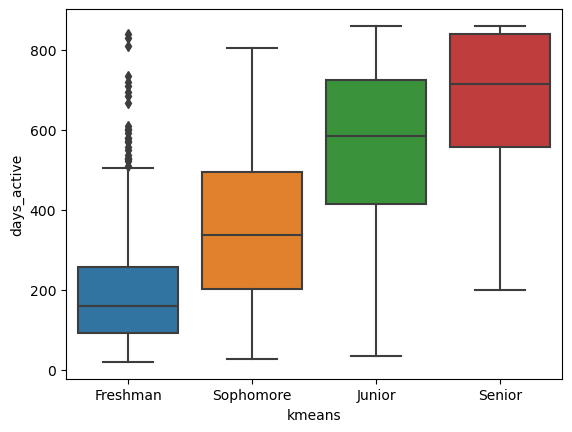

In [258]:
sns.boxplot(x = df_cluster.kmeans, y = df_cluster.days_active)
d_data = {grp:df_cluster['days_active'][df_cluster.kmeans == grp] for grp in grps}
F, p = stats.f_oneway(d_data['Sophomore'], d_data['Junior'], d_data['Senior'], d_data['Freshman'])
if p <= 0.05:
    print('F-stats:', round(F,2), 'p-value:', round(p,2), 'significant difference between clusters')
else:
    print('F-stats:', round(F,2), 'p-value:', round(p,2),  'no significant difference between clusters')

F-stats: 331.39 p-value: 0.0 significant difference between clusters


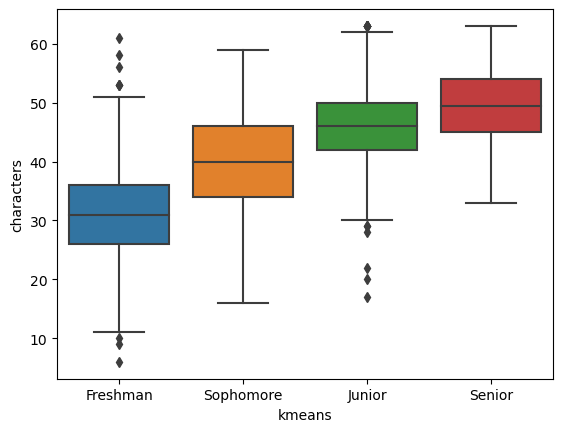

In [259]:
sns.boxplot(x = df_cluster.kmeans, y = df_cluster.characters)
d_data = {grp:df_cluster['characters'][df_cluster.kmeans == grp] for grp in grps}
F, p = stats.f_oneway(d_data['Sophomore'], d_data['Junior'], d_data['Senior'], d_data['Freshman'])
if p <= 0.05:
    print('F-stats:', round(F,2), 'p-value:', round(p,2), 'significant difference between clusters')
else:
    print('F-stats:', round(F,2), 'p-value:', round(p,2),  'no significant difference between clusters')

F-stats: 458.96 p-value: 0.0 significant difference between clusters


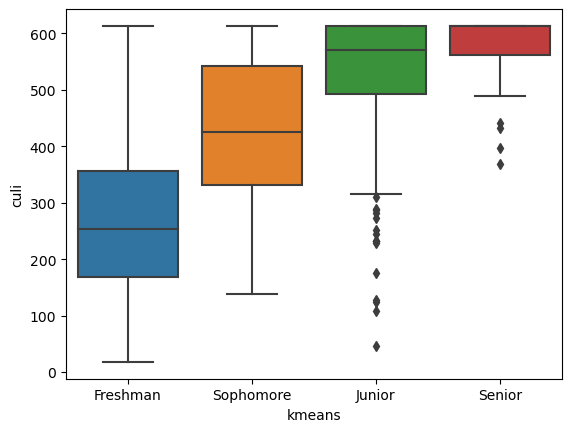

In [260]:
sns.boxplot(x = df_cluster.kmeans, y = df_cluster.culi)
d_data = {grp:df_cluster['culi'][df_cluster.kmeans == grp] for grp in grps}
F, p = stats.f_oneway(d_data['Sophomore'], d_data['Junior'], d_data['Senior'], d_data['Freshman'])
if p <= 0.05:
    print('F-stats:', round(F,2), 'p-value:', round(p,2), 'significant difference between clusters')
else:
    print('F-stats:', round(F,2), 'p-value:', round(p,2),  'no significant difference between clusters')

F-stats: 664.67 p-value: 0.0 significant difference between clusters


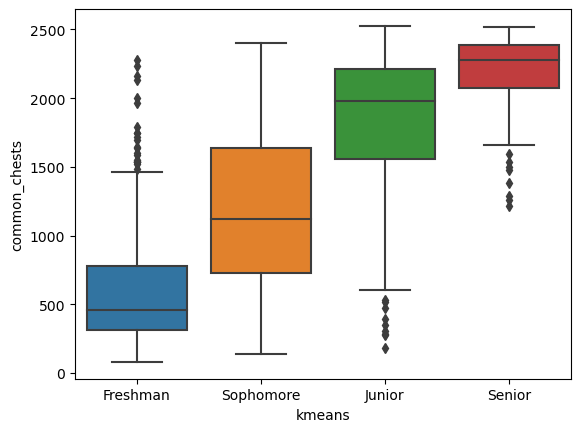

In [261]:
sns.boxplot(x = df_cluster.kmeans, y = df_cluster.common_chests)
d_data = {grp:df_cluster['common_chests'][df_cluster.kmeans == grp] for grp in grps}
F, p = stats.f_oneway(d_data['Sophomore'], d_data['Junior'], d_data['Senior'], d_data['Freshman'])
if p <= 0.05:
    print('F-stats:', round(F,2), 'p-value:', round(p,2), 'significant difference between clusters')
else:
    print('F-stats:', round(F,2), 'p-value:', round(p,2),  'no significant difference between clusters')

F-stats: 671.82 p-value: 0.0 significant difference between clusters


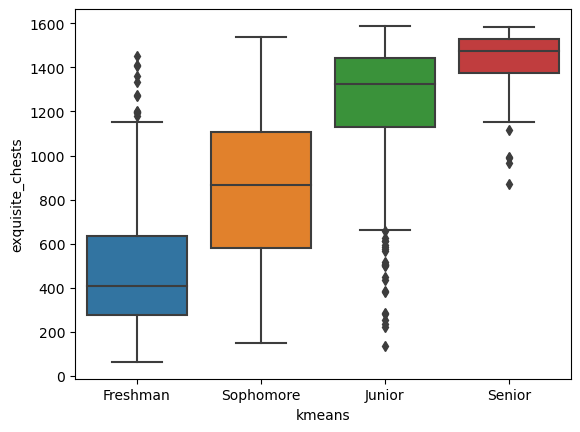

In [262]:
sns.boxplot(x = df_cluster.kmeans, y = df_cluster.exquisite_chests)
d_data = {grp:df_cluster['exquisite_chests'][df_cluster.kmeans == grp] for grp in grps}
F, p = stats.f_oneway(d_data['Sophomore'], d_data['Junior'], d_data['Senior'], d_data['Freshman'])
if p <= 0.05:
    print('F-stats:', round(F,2), 'p-value:', round(p,2), 'significant difference between clusters')
else:
    print('F-stats:', round(F,2), 'p-value:', round(p,2),  'no significant difference between clusters')

F-stats: 655.52 p-value: 0.0 significant difference between clusters


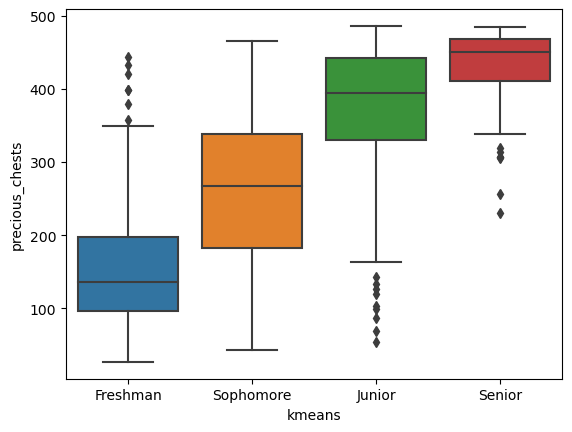

In [263]:
sns.boxplot(x = df_cluster.kmeans, y = df_cluster.precious_chests)
d_data = {grp:df_cluster['precious_chests'][df_cluster.kmeans == grp] for grp in grps}
F, p = stats.f_oneway(d_data['Sophomore'], d_data['Junior'], d_data['Senior'], d_data['Freshman'])
if p <= 0.05:
    print('F-stats:', round(F,2), 'p-value:', round(p,2), 'significant difference between clusters')
else:
    print('F-stats:', round(F,2), 'p-value:', round(p,2),  'no significant difference between clusters')

F-stats: 630.08 p-value: 0.0 significant difference between clusters


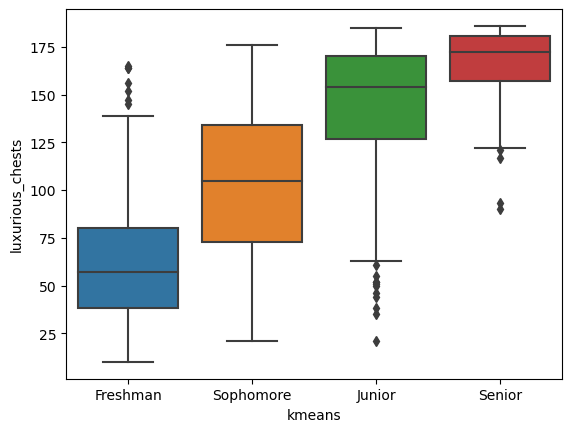

In [264]:
sns.boxplot(x = df_cluster.kmeans, y = df_cluster.luxurious_chests)
d_data = {grp:df_cluster['luxurious_chests'][df_cluster.kmeans == grp] for grp in grps}
F, p = stats.f_oneway(d_data['Sophomore'], d_data['Junior'], d_data['Senior'], d_data['Freshman'])
if p <= 0.05:
    print('F-stats:', round(F,2), 'p-value:', round(p,2), 'significant difference between clusters')
else:
    print('F-stats:', round(F,2), 'p-value:', round(p,2),  'no significant difference between clusters')

F-stats: 535.66 p-value: 0.0 significant difference between clusters


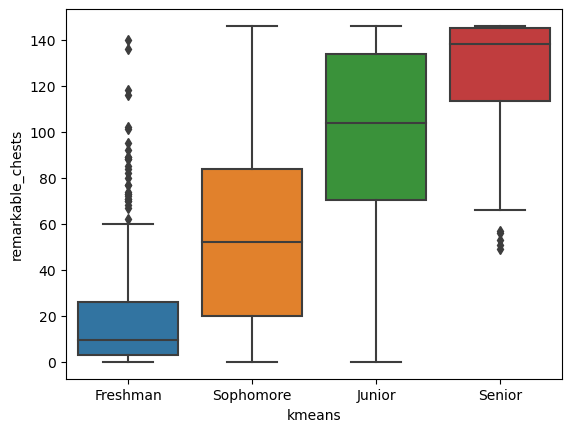

In [265]:
sns.boxplot(x = df_cluster.kmeans, y = df_cluster.remarkable_chests)
d_data = {grp:df_cluster['remarkable_chests'][df_cluster.kmeans == grp] for grp in grps}
F, p = stats.f_oneway(d_data['Sophomore'], d_data['Junior'], d_data['Senior'], d_data['Freshman'])
if p <= 0.05:
    print('F-stats:', round(F,2), 'p-value:', round(p,2), 'significant difference between clusters')
else:
    print('F-stats:', round(F,2), 'p-value:', round(p,2),  'no significant difference between clusters')

F-stats: 228.99 p-value: 0.0 significant difference between clusters


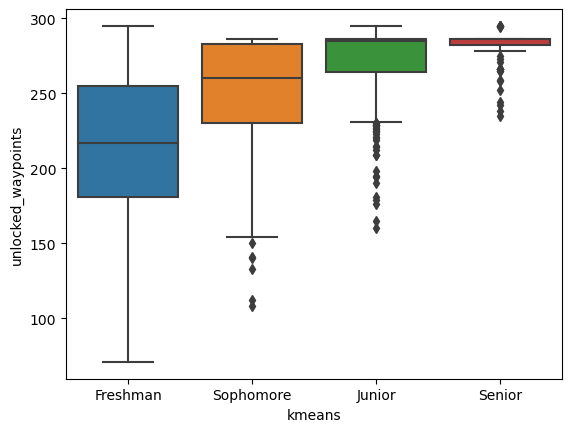

In [266]:
sns.boxplot(x = df_cluster.kmeans, y = df_cluster.unlocked_waypoints)
d_data = {grp:df_cluster['unlocked_waypoints'][df_cluster.kmeans == grp] for grp in grps}
F, p = stats.f_oneway(d_data['Sophomore'], d_data['Junior'], d_data['Senior'], d_data['Freshman'])
if p <= 0.05:
    print('F-stats:', round(F,2), 'p-value:', round(p,2), 'significant difference between clusters')
else:
    print('F-stats:', round(F,2), 'p-value:', round(p,2),  'no significant difference between clusters')

F-stats: 331.36 p-value: 0.0 significant difference between clusters


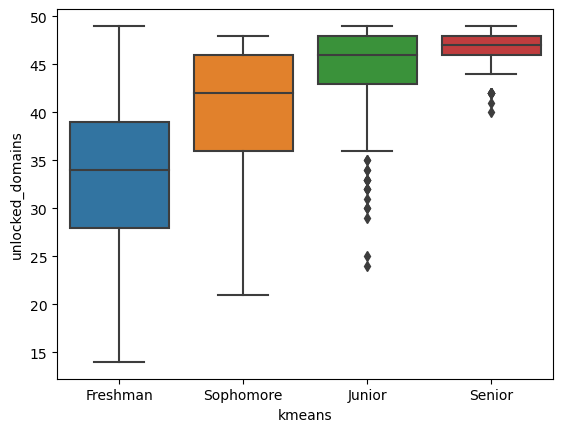

In [267]:
sns.boxplot(x = df_cluster.kmeans, y = df_cluster.unlocked_domains)
d_data = {grp:df_cluster['unlocked_domains'][df_cluster.kmeans == grp] for grp in grps}
F, p = stats.f_oneway(d_data['Sophomore'], d_data['Junior'], d_data['Senior'], d_data['Freshman'])
if p <= 0.05:
    print('F-stats:', round(F,2), 'p-value:', round(p,2), 'significant difference between clusters')
else:
    print('F-stats:', round(F,2), 'p-value:', round(p,2),  'no significant difference between clusters')

F-stats: 750.98 p-value: 0.0 significant difference between clusters


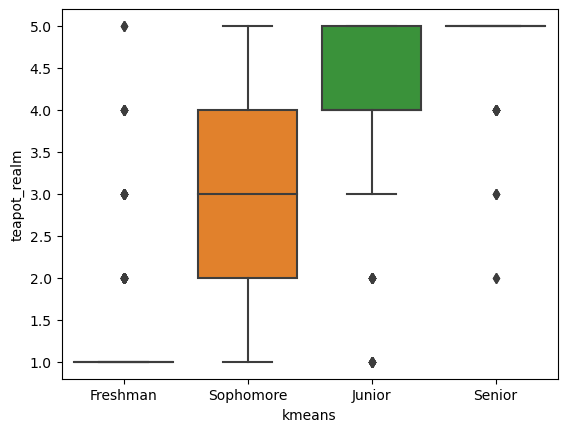

In [268]:
sns.boxplot(x = df_cluster.kmeans, y = df_cluster.teapot_realm)
d_data = {grp:df_cluster['teapot_realm'][df_cluster.kmeans == grp] for grp in grps}
F, p = stats.f_oneway(d_data['Sophomore'], d_data['Junior'], d_data['Senior'], d_data['Freshman'])
if p <= 0.05:
    print('F-stats:', round(F,2), 'p-value:', round(p,2), 'significant difference between clusters')
else:
    print('F-stats:', round(F,2), 'p-value:', round(p,2),  'no significant difference between clusters')

F-stats: 214.73 p-value: 0.0 significant difference between clusters


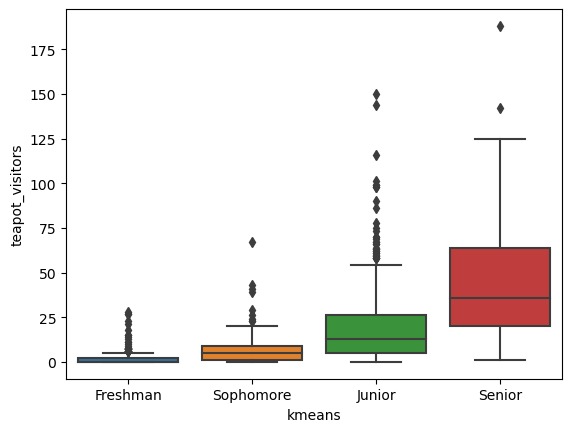

In [269]:
sns.boxplot(x = df_cluster.kmeans, y = df_cluster.teapot_visitors)
d_data = {grp:df_cluster['teapot_visitors'][df_cluster.kmeans == grp] for grp in grps}
F, p = stats.f_oneway(d_data['Sophomore'], d_data['Junior'], d_data['Senior'], d_data['Freshman'])
if p <= 0.05:
    print('F-stats:', round(F,2), 'p-value:', round(p,2), 'significant difference between clusters')
else:
    print('F-stats:', round(F,2), 'p-value:', round(p,2),  'no significant difference between clusters')

F-stats: 5317.51 p-value: 0.0 significant difference between clusters


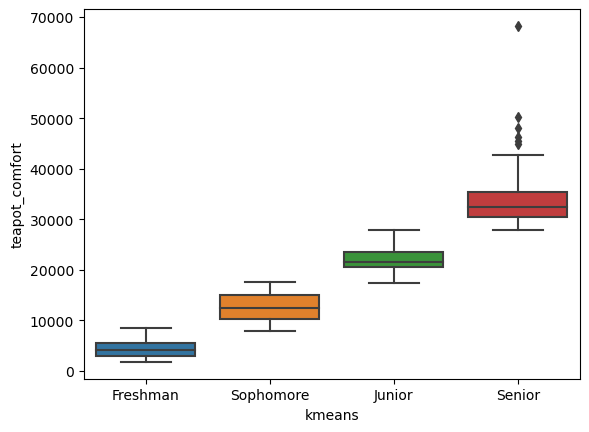

In [270]:
sns.boxplot(x = df_cluster.kmeans, y = df_cluster.teapot_comfort)
d_data = {grp:df_cluster['teapot_comfort'][df_cluster.kmeans == grp] for grp in grps}
F, p = stats.f_oneway(d_data['Sophomore'], d_data['Junior'], d_data['Senior'], d_data['Freshman'])
if p <= 0.05:
    print('F-stats:', round(F,2), 'p-value:', round(p,2), 'significant difference between clusters')
else:
    print('F-stats:', round(F,2), 'p-value:', round(p,2),  'no significant difference between clusters')

F-stats: 630.43 p-value: 0.0 significant difference between clusters


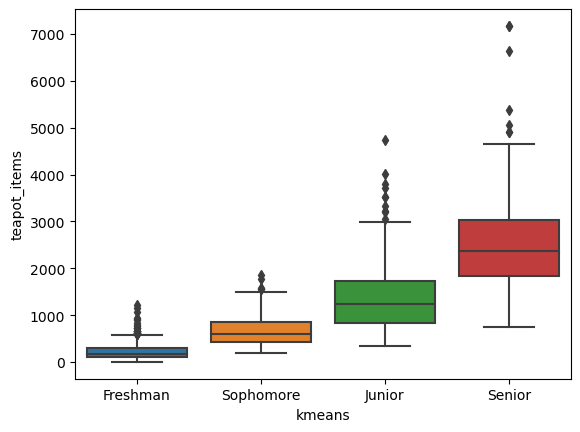

In [271]:
sns.boxplot(x = df_cluster.kmeans, y = df_cluster.teapot_items)
d_data = {grp:df_cluster['teapot_items'][df_cluster.kmeans == grp] for grp in grps}
F, p = stats.f_oneway(d_data['Sophomore'], d_data['Junior'], d_data['Senior'], d_data['Freshman'])
if p <= 0.05:
    print('F-stats:', round(F,2), 'p-value:', round(p,2), 'significant difference between clusters')
else:
    print('F-stats:', round(F,2), 'p-value:', round(p,2),  'no significant difference between clusters')

F-stats: 593.11 p-value: 0.0 significant difference between clusters


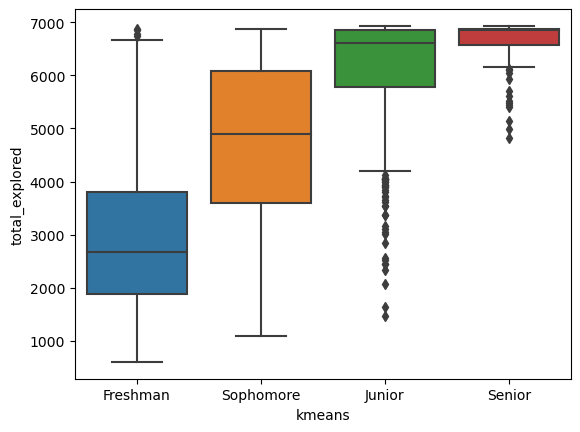

In [272]:
sns.boxplot(x = df_cluster.kmeans, y = df_cluster.total_explored)
d_data = {grp:df_cluster['total_explored'][df_cluster.kmeans == grp] for grp in grps}
F, p = stats.f_oneway(d_data['Sophomore'], d_data['Junior'], d_data['Senior'], d_data['Freshman'])
if p <= 0.05:
    print('F-stats:', round(F,2), 'p-value:', round(p,2), 'significant difference between clusters')
else:
    print('F-stats:', round(F,2), 'p-value:', round(p,2),  'no significant difference between clusters')

F-stats: 44.03 p-value: 0.0 significant difference between clusters


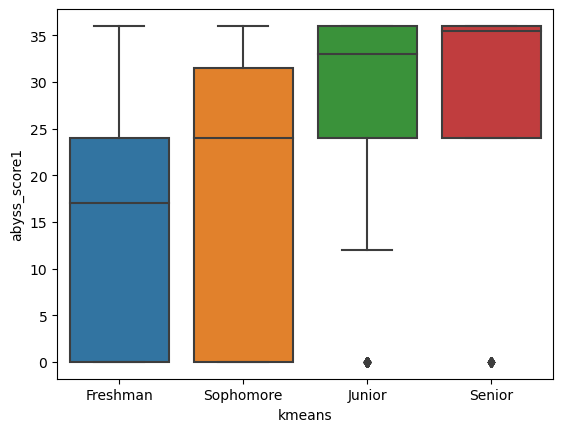

In [273]:
sns.boxplot(x = df_cluster.kmeans, y = df_cluster.abyss_score1)
d_data = {grp:df_cluster['abyss_score1'][df_cluster.kmeans == grp] for grp in grps}
F, p = stats.f_oneway(d_data['Sophomore'], d_data['Junior'], d_data['Senior'], d_data['Freshman'])
if p <= 0.05:
    print('F-stats:', round(F,2), 'p-value:', round(p,2), 'significant difference between clusters')
else:
    print('F-stats:', round(F,2), 'p-value:', round(p,2),  'no significant difference between clusters')

F-stats: 255.69 p-value: 0.0 significant difference between clusters


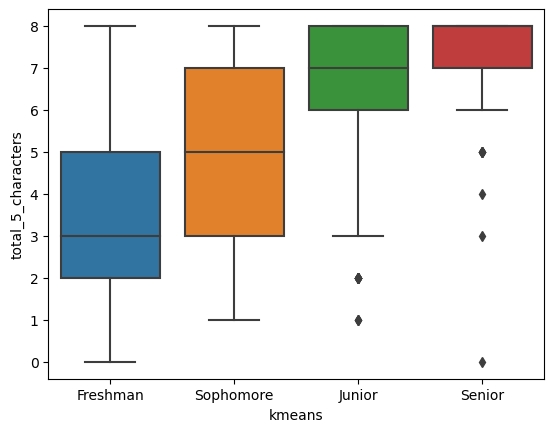

In [274]:
sns.boxplot(x = df_cluster.kmeans, y = df_cluster.total_5_characters)
d_data = {grp:df_cluster['total_5_characters'][df_cluster.kmeans == grp] for grp in grps}
F, p = stats.f_oneway(d_data['Sophomore'], d_data['Junior'], d_data['Senior'], d_data['Freshman'])
if p <= 0.05:
    print('F-stats:', round(F,2), 'p-value:', round(p,2), 'significant difference between clusters')
else:
    print('F-stats:', round(F,2), 'p-value:', round(p,2),  'no significant difference between clusters')

F-stats: 57.43 p-value: 0.0 significant difference between clusters


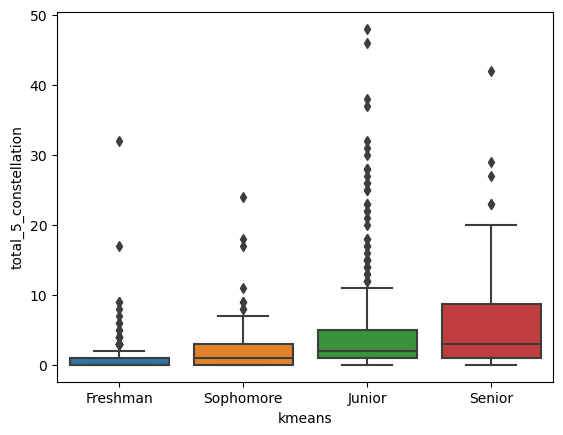

In [275]:
sns.boxplot(x = df_cluster.kmeans, y = df_cluster.total_5_constellation)
d_data = {grp:df_cluster['total_5_constellation'][df_cluster.kmeans == grp] for grp in grps}
F, p = stats.f_oneway(d_data['Sophomore'], d_data['Junior'], d_data['Senior'], d_data['Freshman'])
if p <= 0.05:
    print('F-stats:', round(F,2), 'p-value:', round(p,2), 'significant difference between clusters')
else:
    print('F-stats:', round(F,2), 'p-value:', round(p,2),  'no significant difference between clusters')

F-stats: 146.79 p-value: 0.0 significant difference between clusters


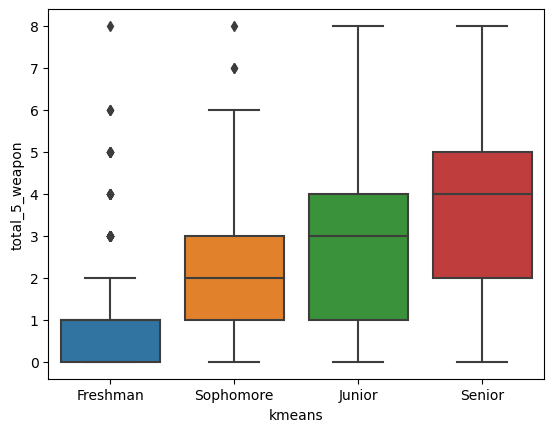

In [276]:
sns.boxplot(x = df_cluster.kmeans, y = df_cluster.total_5_weapon)
d_data = {grp:df_cluster['total_5_weapon'][df_cluster.kmeans == grp] for grp in grps}
F, p = stats.f_oneway(d_data['Sophomore'], d_data['Junior'], d_data['Senior'], d_data['Freshman'])
if p <= 0.05:
    print('F-stats:', round(F,2), 'p-value:', round(p,2), 'significant difference between clusters')
else:
    print('F-stats:', round(F,2), 'p-value:', round(p,2),  'no significant difference between clusters')

F-stats: 86.46 p-value: 0.0 significant difference between clusters


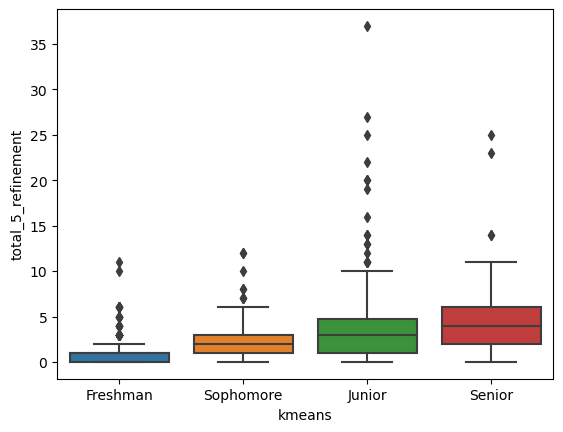

In [277]:
sns.boxplot(x = df_cluster.kmeans, y = df_cluster.total_5_refinement)
d_data = {grp:df_cluster['total_5_refinement'][df_cluster.kmeans == grp] for grp in grps}
F, p = stats.f_oneway(d_data['Sophomore'], d_data['Junior'], d_data['Senior'], d_data['Freshman'])
if p <= 0.05:
    print('F-stats:', round(F,2), 'p-value:', round(p,2), 'significant difference between clusters')
else:
    print('F-stats:', round(F,2), 'p-value:', round(p,2),  'no significant difference between clusters')